# <span style="color:cornflowerblue">Matplotlib for Publication</span>

### When visualizing your research data, you may ask yourself...
- What is the best plot format to communicate the results of my research?
- How can I combine or overlay related data without sacrificing readability?
- How do I make my figures typographically consistent with each other and the rest of the paper?
- How can I make my figures more accessible to readers with colorblindness or other common impairments?
- What might be lost if my figure is printed (e.g., in greyscale or resized to fit on A4 paper)?

With this workshop I hope to not only enrich your Matplotlib skillset, but also advise on good practices for making your data visuals more accessible, informative, and professional.

Many of these tips, though informed by experience, are subjective and open to disagreement. Plotting is as much an art as it is a science.

### Prerequisites
In order to follow this course, you will need to be familiar with:
* The Python 3.X language and data structures (e.g. dictionaries)
* NumPy

It will also help to have experience with:
* SciPy
* Pandas
* LaTeX math typesetting (reference links are provided)

Please note that **this was not intended as a Matplotlib introductory course.** We will move quickly; the review section is provided to remind viewers of best practices and fill gaps in knowledge about available plot types. If you are new to Matplotlib and want to familiarize yourself at your own pace first, please visit [Matplotlib's Quick Start Guide](https://matplotlib.org/stable/users/explain/quick_start.html).

# 0. Review

Before we get started, I'd like to remind readers of the meanings of the terms `args` and `kwargs`, since they will appear frequently:
- `args` refer to *positional arguments*, which are usually mandatory, but not always. These always come before the `kwargs`.
- `kwargs` are short for *keyword arguments*. These are usually optional, but it's fairly common for some python functions to require a variable subset of all available kwargs dependent on previous inputs. These always come after `args`.
If you're not familiar with different parts of a Matplotlib plot (i.e. if you don't remember what terms like ticks, markers, and spines), please [click here to review Matplotlib's Anatomy of a Plot demo.](https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure)

I'd also like to go over the difference between the use of, say, `plt.plot()` and `ax.plot()` where `fig,axes = plt.subplots()`. Use of the former is considered an implicit application interface (API), and the latter makes the interface explicit (see also [this section of the official documentation](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html#api-interfaces)). If you only plan to have 1 pair (or trio) of axes in a single figure **and** have no intention of adding more data to an existing figure after the first plotting command, then it's fine to use the implicit interface (which includes any and all sets of axes in a single frame or GUI window) or whatever set of axes is drawn to accommodate your data. However, if you plan to have multiple subplots, or add data to existing plots in a GUI (not applicable if working in Jupyter), or need to do basically any kind of complex formatting, the explicit interface will let you do that much more easily. You can use the `plt.<plot_type>()` version for quick visualizations that you don't need to format, but for publication, you will typically want to use `fig,axes = plt.subplots(nrows, ncols)`, even if you only have 1 set of axes (in which case you would skip the `nrows` and `ncols` args). There are also the `plt.subplot()` and `fig.add_subplot()` methods, but they require more code to put $>$1 plot on a single figure; the main benefit they add is that you can set different coordinate projections for each subplot in a figure with multiple subplots. Below I show very basic examples for each method:

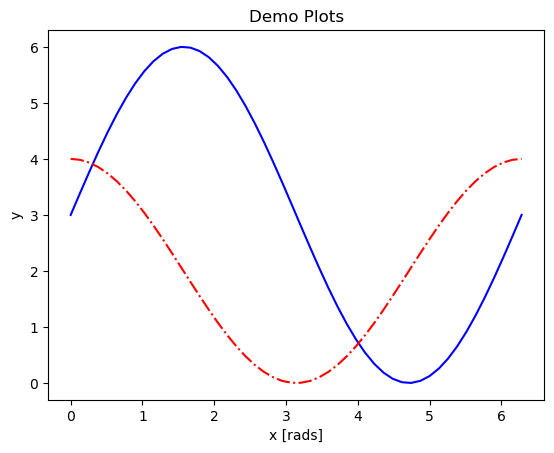

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sb
import matplotlib as mpl
# I will give a tutorial on Pandas later; the exercise notebooks will have
#   any necessary pandas commands already included
#mpl.rcParams(fontsize=14)
%matplotlib inline

# fake some data
x = np.linspace(0,2*np.pi, 50)
# Minimum working example
plt.plot(x,3+3*np.sin(x),'b-', x, 2+2*np.cos(x), 'r-.')
plt.xlabel('x [rads]')
plt.ylabel('y')
plt.title('Demo Plots')
plt.show()

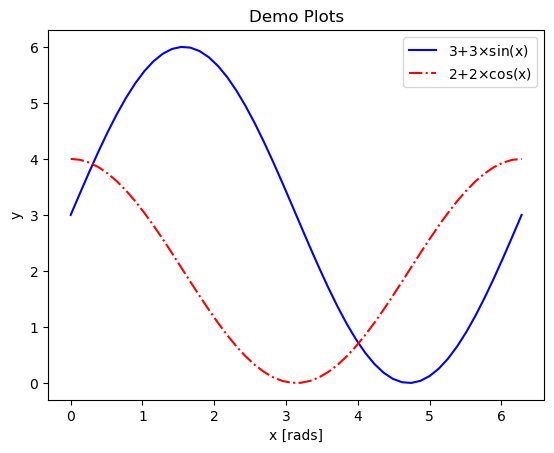

In [25]:
# Better way for later formatting
fig, ax = plt.subplots()
ax.plot(x,3+3*np.sin(x),'b-', label=r'3+3$\times$sin(x)')
ax.plot(x, 2+2*np.cos(x), 'r-.', label=r'2+2$\times$cos(x)')
ax.legend()
ax.set_xlabel('x [rads]')
ax.set_ylabel('y')
ax.set_title('Demo Plots')
plt.show()

**Please note:** the `.plot()` function can take multiple sets of data, but can only support a label for a single set of x-y value pairs. You cannot, for instance, pass a bunch of functions with different y values and formats and then pass a list of labels at the end, and positional arguments can never follow kwargs, so you cannot label each function individually unless you break them up. To label your functions for use in a legend, each set of pairwise data must be plotted with a separate call to the `.plot()` function. Most plotting functions support a `label` kwarg, but `label` is always a string, not a list or other iterable, and no other plotting function supports multiple pairwise data sets in a single function call via positional arguments.

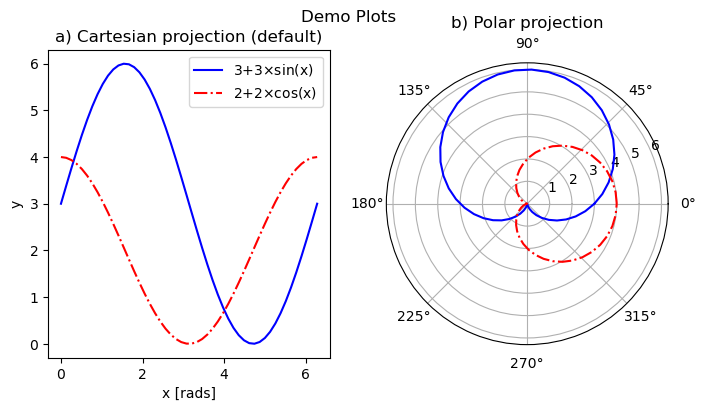

In [30]:
# for variable projections
fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
#once labels are added, have to break up plt.plot()
#  args cannot follow kwargs
ax1.plot(x,3+3*np.sin(x),'b-', label=r'3+3$\times$sin(x)')
ax1.plot(x, 2+2*np.cos(x), 'r-.', label=r'2+2$\times$cos(x)')
ax1.set_xlabel('x [rads]')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('a) Cartesian projection (default)')

ax2 = plt.subplot(122, projection='polar')
ax2.plot(x, 3+3*np.sin(x), 'b-', x, 2+2*np.cos(x), 'r-.')
ax2.set_title('b) Polar projection')
fig.suptitle('Demo Plots')
plt.show()

I also want you to notice that as methods of `axes` instances, the label setting functions begin with `set_` while as methods of `plt`, they don't. That's pretty typical of the various formatting functions you can call, so be aware of that.

When adding legends, text, annotations, colorbars, or other elements, it's good to know how to control their positions. To know that, you need to know  

## Standard Available Plot Types

These are the categories of plots that come standard with any Matplotlib distribution: 
1. Pairwise plots (which accept 1D arrays of x and y data to plot against each other),
2. Statistical plots (which can be pairwise or other array-like data), 
3. Gridded data plots (for image-like data, vector fields, and contours), 
4. Irregularly gridded data plots (which usually rely on some kind of triangulation), and
5. Volumetric data plots.

Volumetric, polar, and other data that rely on 3D or non-cartesian grids typically require you to specify a projection before you can choose the right plot type. For example, for a polar plot, you could
- set `fig, ax = plt.subplots(subplot_kw = {"projection": "polar"})` to set all subplots to the same projection,
- set `ax = plt.subplot(nrows, ncols, index, projection='polar')` to add one polar subplot to a group of subplots with different coordinate systems or projections, or
- set `ax = plt.figure().add_subplot(projection='polar')` if you only need 1 set of axes in total.

For volumetric data, the options are similar:
- `fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})` for multiple subplots with the same projection,
- `ax = plt.subplot(nrows, ncols, index, projection='3d')` for one 3D subplot among several with varying projections or coordinate systems, or
- `ax = plt.figure().add_subplot(projection='3d')` for a singular plot.

For all of the following subsections on plot type categories, I give the commands with short descrptions of their behaviors and explanations of non-obvious args and kwargs. If not all positional args are required, optional ones are shown in square brackets (`[]`). Kwargs are shown similarly to how they are in the official documentation, set equal to either their default values or themselves. *Kwargs shown as equal to themselves are technically* `None` *by default, but are shown this way to indicate that they are part of a set of which one or more kwargs are required.* Only frequently used and/or tricky kwargs are shown; refer to the official documentation on each command for the complete list.

### Pairwise Plots
The following is a list of plain pairwise plot commands and descriptions, including notes about common gotchas. 
- `.plot(x1, y1, fmt1, x2, y2, fmt2, …)` or `.plot(x1, y1, fmt1, label='label')` lets you specify any number of lines on the same plot, OR plot one line or set of pairwise data with arbitrary format and a label. A 3-character `fmt` string is typically used specify the marker style, color, and linestyle, although each of those can instead be controlled separately with their own kwargs. If you don't want a line connecting the points, however, you have to explicitly turn it off by setting `linestyle='None'` (yes, that's a string, not the built-in value). It is not possible to include labels when plotting multiple datasets using a single function call. 
- `.scatter(x, y, s=rcParams['lines.markersize'] ** 2, c=‘tab:blue’)` is the more appropriate function to use if you don't want data points to be linked by default. The size argument `s` is a relatively recent addition, and it accepts a scalar or an array of the same size as x and y. If you were used to having the third positional argument be color, be aware that now, if you only include 3 positional arguments, the third will now be interpreted as size, not color, so if you only want to specify the color and use the default size, you must specify the color as a kwarg. The color argument `c` can be a solid color, a list of colors the same length as `x` and `y`, or an array of values the same length as `x` and `y` that are mapped to colors via the kwarg `cmap`. Marker styles, sizes, opacities, and edge- and fill colors can all be specified separately.
- `.stem(x, y[, z])` is visually similar to scatter, but the underlying implementation is very different. It returns a 3-tuple of the markers, stemlines, and baseline. The default baseline settings assume the data are sequential, and control marker colors and line styles is limited and tedious to implement because they require you to modify elements of the returned tuple afterward. Unfortunately this limits its utility in 3D, where it might otherwise be very effective.
- `.fill_between(x, y1, y2=0, color=‘tab:blue’, alpha=1)` lets you plot 2 lines and shade between them, which is handy for, say, showing an uncertainty region around a model function. It also includes a very helpful `where` kwarg that you can use to fill only areas that match a certain condition, which you can use to highlight where a function is above or below some threshold. Bear in mind, the `where` kwarg can only accommodate one condition at a time, so if you wanted to, say, color the function blue if it's above a line and red if it's below, you would have to call `.fill_between()` twice, once for the data above the line to be colored blue and once for the data below the line to be colored red.
- `.bar(cat, count)` and `.barh(cat, count)` are essentially the same command except the latter orients the bars horizontally. To stack bars, there is a `bottom` kwarg for `bar()` and a `left` kwarg for `barh()` to change the baselines of successive bars. Clustered bars are somewhat more difficult, but I will show an example with both stacking and offsets later in the course. This function does not support a `label` kwarg because the labels are typically the first positional arg `cat`.
- `.stackplot(x, ys, baseline=0)` accepts a 1D array for `x`, but `ys` can be a 2D array or a dictionary of 1D arrays. It also supports a format that is called a streamgraph wherein the `baseline` kwarg is changed from the default 0 to `wiggle`; in this case, the baseline is some non-zero value and some series of y-values are allowed to be stacked below or above it.
- `.stairs(y, edges=[x[0]]+x)` is a way of rendering a stepwise function or histogram where each step is height `y` between points `x[i]` and `x[i+1]`, i.e. the array `edges` must always have 1 more element than `y`.
- `.step(x, y, where=‘pre’)` is superficially similar to `stairs`, but `x` and `y` are the same length, and the `where` kwarg lets you choose whether each (`x,y`) is to be treated as the left edge of a step (`'pre'`), the center of a step (`'mid'`), or the right edge of a step (`'post'`).

Normally I prefer to use real data for demonstrations, but aside from `.scatter()`, most of these plots are more suited for models rather than measurements. I'll plot related plots on grids so you can see how indexed axes objects work. Note that `sharex` (and `sharey`) turns off tick labels for axes along the interior boundaries of cells in the grid.

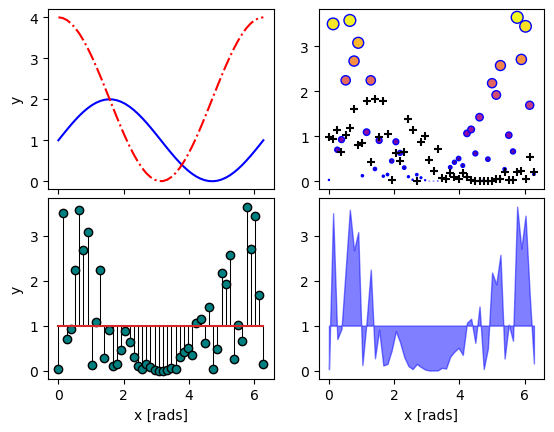

In [515]:
import matplotlib as mpl
fig, axes=plt.subplots(nrows=2,ncols=2, sharex=True)
plt.subplots_adjust(hspace=0.05) #lateral spacing is adjusted with wspace kwarg
#1. Line plots
x = np.linspace(0,2*np.pi, 50)
axes[0,0].plot(x,1+np.sin(x),'b-', x, 2+2*np.cos(x), 'r-.')
axes[0,0].set_ylabel('y')

#2. scatter (line plot data with added noise, colored by amplitude)
y1 = (2+2*np.cos(x))*np.random.random_sample(len(x))
y2 = (1+np.sin(x))*np.random.random_sample(len(x)) 
axes[0,1].scatter( x, y1, s=y1*20, c=y1, cmap=mpl.colormaps['plasma'], edgecolors='b')
axes[0,1].scatter( x, y2, c='k', marker='+')

#3. stem (more noisy line plot data) 
markers,stems,baseline = axes[1,0].stem( x, y1, linefmt='k-', bottom=1.0)
stems.set_linewidth(0.75)
markers.set_markerfacecolor('teal')
axes[1,0].set_xlabel('x [rads]')
axes[1,0].set_ylabel('y')

#4. fill-between with the where kwarg
# 1 command with no where fills both sides with the same color
axes[1,1].fill_between( x, 1, y1, color='b', alpha=0.5) #where = y1 > 1, 
#axes[1,1].fill_between( x, y1, 1, where = y1 < 1, color='r', alpha=0.5)
axes[1,1].set_xlabel('x [rads]')
plt.show()

In [128]:
rng = np.random.default_rng()
grades = rng.integers(low=55, high=100, size=[4,4])
subj = ['math', 'hist', 'lang', 'sci']
names = ['Tom', 'Liz', 'Harry', 'Jane']
gbook = pd.DataFrame(grades, columns=subj, index=names)
print(gbook)

       math  hist  lang  sci
Tom      65    96    81   69
Liz      63    61    82   90
Harry    88    70    93   75
Jane     95    73    57   80


Text(0.5, 0, "Jane's scores")

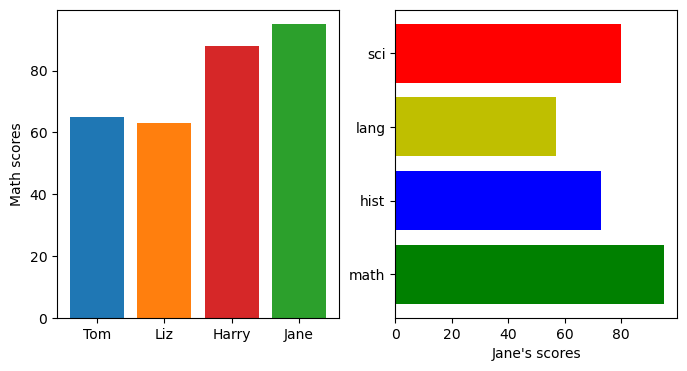

In [162]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
axes[0].bar(names, gbook['math'].to_numpy(),
            color=['tab:blue','tab:orange','tab:red','tab:green'])
axes[0].set_ylabel('Math scores')
axes[1].barh(subj, gbook.loc['Jane',:].to_numpy(), color=['g','b','y','r'])
axes[1].set_xlabel("Jane's scores")

Before I demonstrate `step()`, `stairs()`, and `stackplot()`, I'd like to demostrate a nice feature you can get with the `plt.subplot_mosaic()` function that I will use to group those plots. `plt.subplot_mosaic()` allows one to set subplots to span multiple rows or columns. The letters that are used to identify each plot don't really matter as long as they are a single ASCII character. The only fixed character is the `"."`, which is used to denote gaps. Below I've used the more intuitive layout, but you can also separate rows with `;` for more compact code (no spaces!). Moreover, there is a `per_subplot_kw` to which you can pass a dictionary of the plot keys (the same ASCII characters used to denote each subplot in the layout string) and kwargs, which is useful if you need to specify a different axis projection for each plot.

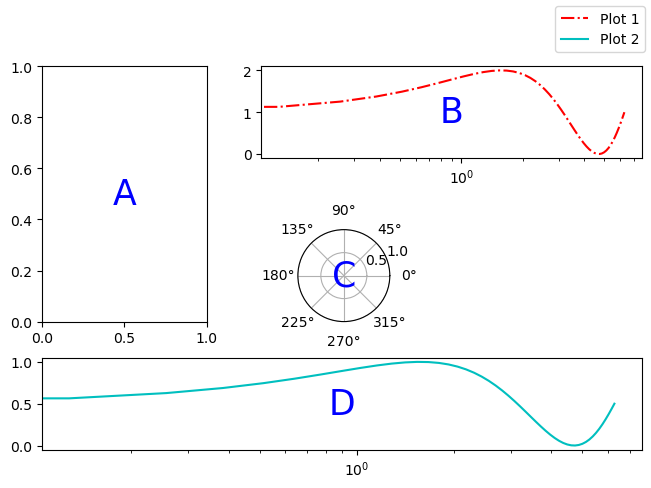

In [389]:
fig, axd = plt.subplot_mosaic(
    """
    ABB
    AC.
    DDD
    """, layout="constrained",
    per_subplot_kw={"C": {"projection": "polar"},
                   ('B','D'): {'xscale':'log'}})
for k, ax in axd.items():
    ax.text(0.5, 0.5, k, transform=ax.transAxes, 
            ha="center", va="center",  color="b",
            fontsize=25)
axd['B'].plot(x, 1+np.sin(x), 'r-.',
              label='Plot 1')
axd['D'].plot(x,0.5+0.5*np.sin(x), 'c-',
              label='Plot 2')
fig.legend(loc='outside upper right')

Now I'll demonstrate `stairs`, `step`, and `streamplot`:

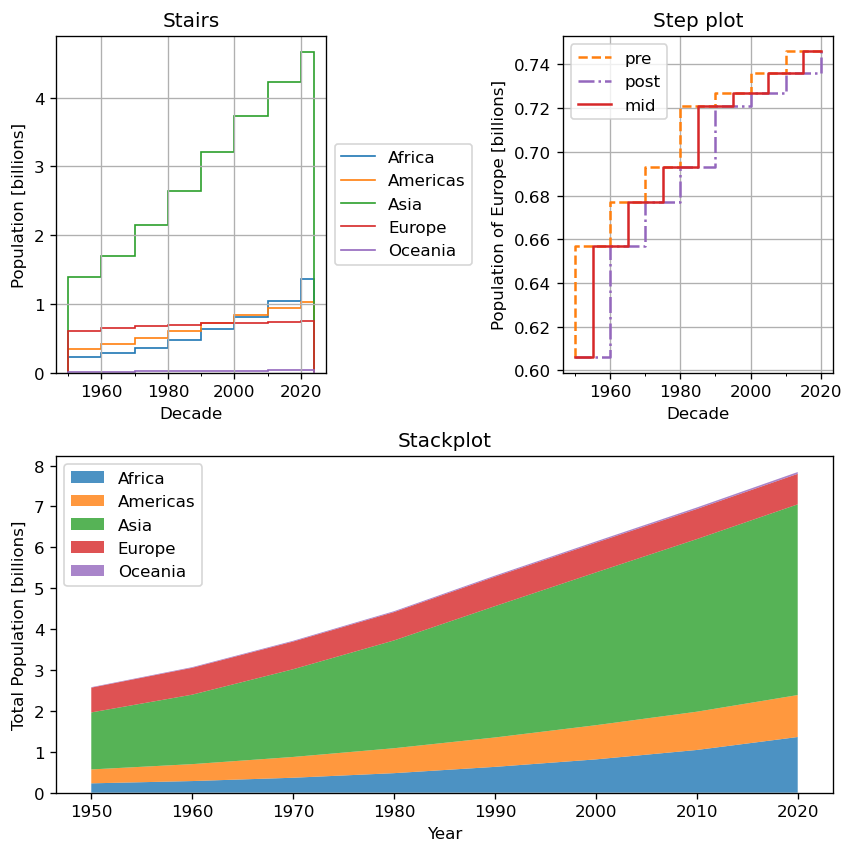

In [8]:
# data from https://www.worldometers.info/world-population/
# from UN World Population Prospects: 2022 Revision. (Medium-fertility variant)
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
pop_by_continent = {
    'Africa': [.228, .284, .365, .477, .631, .814, 1.044, 1.361],
    'Americas': [.340, .2197+.194, .2865+.2218, .362+.2478,
                 .443+.2759, .5225+.3132, .5905+.3453, .6518+.374],
    'Asia': [1.394, 1.699, 2.145, 2.636, 3.211, 3.736, 4.221, 4.664],
    'Europe': [.606, .657, .677, .693, .721, .727, .736, .746],
    'Oceania': [.012, .016, .019, .022, .026, .031, .037, .044],
}

axd = plt.figure(layout="constrained", figsize=(7,7), dpi=120).subplot_mosaic("AABB;CCCC")
for k, v in pop_by_continent.items():
    axd['A'].stairs(v, year+[2024], label=k)
axd['A'].set_xlabel('Decade')
axd['A'].set_ylabel('Population [billions]')
axd['A'].set_title('Stairs')
axd['A'].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10)) #just to mark every decade
axd['A'].grid(True)
axd['A'].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axd['B'].step(year, pop_by_continent['Europe'], where='pre', ls='--',
              color='tab:orange', label='pre')
axd['B'].step(year, pop_by_continent['Europe'], where='post', ls='-.',
              color='tab:purple', label='post')
axd['B'].step(year, pop_by_continent['Europe'], where='mid',
              color='tab:red', label='mid')
axd['B'].set_xlabel('Decade')
axd['B'].set_ylabel('Population of Europe [billions]')
axd['B'].set_title('Step plot')
axd['B'].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
axd['B'].grid(True)
axd['B'].legend()

axd['C'].stackplot(year, pop_by_continent.values(),
             labels=pop_by_continent.keys(), alpha=0.8)
axd['C'].set_ylabel('Total Population [billions]')
axd['C'].set_xlabel('Year')
axd['C'].set_title('Stackplot')
axd['C'].legend(loc='upper left')

### Statistical Plots
Statistical plots include the following:
- `.errorbar(x, y, xerr=xerr, yerr=yerr)` works similarly to `scatter()` but additionally accepts error margins in either or both the x- and y-directions. `xerr` and `yerr` may be either 1$\times n$ or 2$\times n$ (for asymmetric error bars) where $n$ is the length of x and y. There are also upper and lower limits kwargs, `uplims`, `lolims`, `xlolims`, and `xuplims` that accept 1D boolean arrays where True indicates that the upper, lower, left, and/or right error bars (respectively) of the given point are limits rather than firm margins. **Note**: `xerr` or `yerr` at a point with a limit must still have a suitable non-zero fill value in order to draw an appropriately-sized limit arrow. Also important to note when the data are more scattered: `errorbar()` by default connects sequential data points with a line unless you set `linestyle=''` (yes, that's different from how it's done for `plot()`).
- `.hist(x, bins=10)` computes and draws 1D histograms where `bins` can be either an integer number of bins or a fixed array of bin edges. There are several combinations of kwargs that let you draw stacked histograms of varying appearances. Bins may also be log-scaled in height.
- `.hist2d(x, y, bins=100)` computes and draws a 2D histogram where `bins` can be an integer number of bins along both axes, a 2-tuple of iteger numbers of bins along each axis individually, a 1D array of bin edges along both axes, or a 2$\times$n array of bin edges, one 1D array per axis. Bins are colored by counts according to the colormap and intensity scale normalization (linear, log, other) of your choice.
- `.hexbin(x, y, C=None, gridsize=100)` is functionally somewhere between `hist2d` and `imshow` (which we'll cover later). `x` and `y` can be scattered points or the coordinates of the data `C`. If `C` is `None`, the points (x$_i$,y$_i$) are binned on a hexagonal grid and colored by counts in each hexagon. If `C` is given, then every point in `C` must be the intensity at each (x$_i$,y$_i$), which is then internally resampled onto a hexagonal grid (default size 100 hexagons along the `x` axis and whatever number along the `y` axis makes the hexagons symmetric.)
- `.boxplot(X)` takes an array-like `X`, represening *n* 1D distributions, plots a rectangle spanning the upper and lower quartiles with a line marking the median and errorbar-like "whiskers" extending 1.5 times the interquartile range from the box. Data beyond the box-and-whiskers, called "fliers", are plotted as open circles along the same vertical axis as the associated box. There are plenty of kwargs available to change the appearance of the boxes, whether and how to show statistical benchmarks like the mean or median, etc.
- `.violinplot(X)` is similar to `boxplot()` but instead of the boxes and whiskers, it shows bidirectional histogram KDEs (basically smoothed histograms) of each distribution spanning the full range of the data. Again, there are plenty of optional kwargs to toggle on or off and change the appearance of various statistical benchmarks on each distribution, like the mean, median, interquartile range, etc.
- `.ecdf(x)` plots the empirical cumulative distribution function of `x`, which is very similar to using `hist(x, bins=len(x), cumulative=True)`, i.e. it's a cumulative stepwise function where every point is its own step.
- `.eventplot(X)` plots sequences of parallel lines at the positions given by `X`, which may be 1D or 2D depending on whether there are multiple sequences of events to plot or just 1. This plot type is rare outside of neurology where it is used to chart the activation patterns of individually labeled neurons. However, with clever formatting, it could also be used to plot, say, a timeline of events whose duration is negligible compared to the length of the period over which those events are documented.
- `.pie(wedges)` plots a pie chart given relative or absolute wedge sizes. As we'll discuss later, this plot type is both inefficient and poor at communicating the minimal information contained, and so it should generally be avoided.

For demos, I prefer to use real data instead of fudging random data on the spot because it gives more context to the plots being shown, which helps memory retention. Below I will load a demo dataset from the Seaborn module containing measurements of the sizes of beaks and flippers for a few species of penguins.  The data structure that is loaded is a Pandas dataframe; I have a separate training module on Pandas if you're interested in how I'm showing and manipulating the data, but here I'm just using it to show you what the data look like and to minimize the code required to get some real data to work with. Seaborn is mainly a wrapper package for Matplotlib that helps make more polished-looking plots, especially statistical plots, and we'll touch on it later in the seminar. It just so happens that Seaborn includes some public datasets accessible via the `load_dataset()` function, which should really be attached to Pandas instead. These are real measurements taken by biologists working on the Palmer Archipelago of Antarctica.

In [10]:
penguins = sb.load_dataset('penguins') #this loads into a Pandas DataFrame
print(penguins.info()) #this is just to show the contents of the DataFrame
print(penguins['species'].value_counts()) #see unique values & counts of each

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [20]:
chinstrap = penguins.loc[penguins['species']=='Chinstrap']
print(chinstrap.std(numeric_only=True)) #getting some stats for errorbar
#mock up some individual error bars (pretend those penguins are squirmy)
xs = chinstrap['bill_length_mm']
ys = chinstrap['flipper_length_mm']
rng = np.random.default_rng()
xerrs = abs(rng.normal(xs.mean(), xs.std(), size=len(xs))-xs.mean())
yerrs = abs(rng.normal(ys.mean(), ys.std(), size=len(ys))-ys.mean())

bill_length_mm         3.339256
bill_depth_mm          1.135395
flipper_length_mm      7.131894
body_mass_g          384.335081
dtype: float64


Text(0, 0.5, 'Flipper length [mm]')

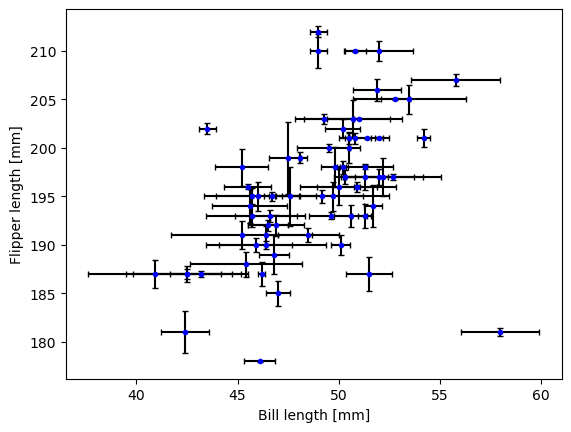

In [472]:
fig, ax = plt.subplots()
ax.errorbar(xs,ys, xerr=xerrs,yerr=yerrs,
            capsize=2,linestyle='',color='b',
            marker='.',ecolor='k')
ax.set_xlabel('Bill length [mm]')
ax.set_ylabel('Flipper length [mm]')

Text(0, 0.5, 'Total mass in Chinstrap penguins')

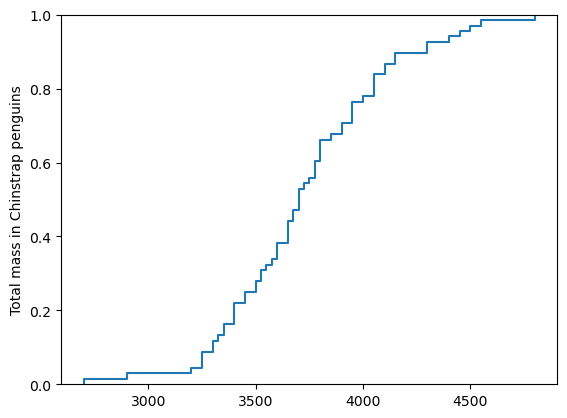

In [24]:
#This is pretty nonsensical, but...
plt.ecdf(chinstrap['body_mass_g'])
plt.ylabel('Total mass in Chinstrap penguins')

To combine the `hist()` and `hist2d()` examples, I'll demostrate a plot of joint and marginal distributions, based on the [official demo with histogram marginal distributions around a scatter plot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html). A proper corner plot is *much* simpler to do with Seaborn, as I'll demonstrate later, but this will give you an idea not just of how the histogram functions look, but how to scale and position connected subplots that are not the same size as the main plot, and how to place a colorbar within a subplot mosaic.

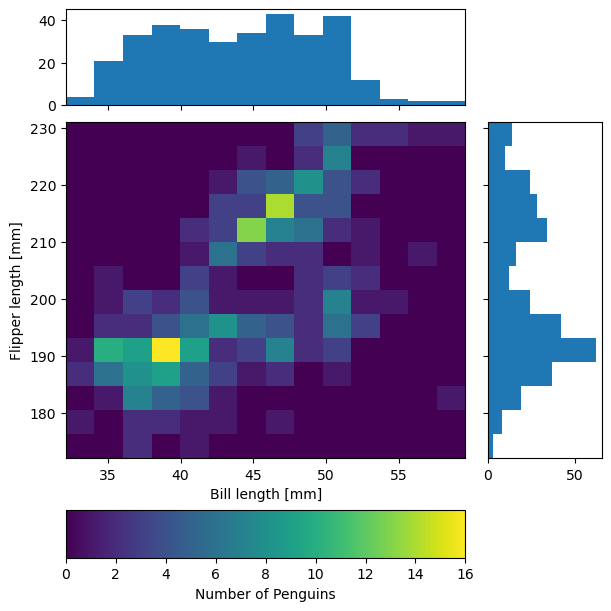

In [12]:
def corner_2p(xdata, ydata, ax2d, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    nbins = int(np.ceil(2*len(xdata)**(1/3))) #Rice binning rule
    # the central 2D histogram:
    n,xb,yb,img = ax2d.hist2d(xdata, ydata, bins = [nbins,nbins])
    #use x- & y-bins from 2D histogram to align them
    ax_histx.hist(xdata, bins=xb) 
    ax_histy.hist(ydata, bins=yb, orientation='horizontal')
    ax_histx.sharex(ax2d)
    ax_histy.sharey(ax2d)
    return img

fig, axd = plt.subplot_mosaic("a.;Bc;d.",layout="constrained",
                              height_ratios=[1, 3.5, 0.5],
                              width_ratios=[3.5, 1],
                              figsize=(6,6), dpi=100)
jointhist = corner_2p(penguins.dropna()['bill_length_mm'],
                      penguins.dropna()['flipper_length_mm'],
                      axd['B'], axd['a'], axd['c'])
axd['B'].set_xlabel('Bill length [mm]')
axd['B'].set_ylabel('Flipper length [mm]')
cb = fig.colorbar(jointhist,cax=axd['d'],
                  orientation='horizontal')
cb.set_label('Number of Penguins')

Text(0, 0.5, 'Flipper length [mm]')

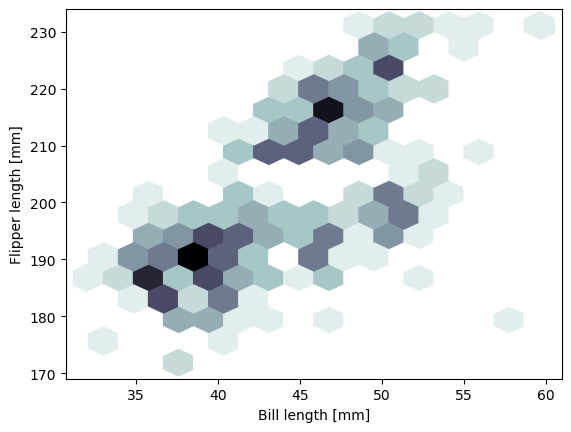

In [628]:
# super simple Hexbin example
plt.hexbin(penguins.dropna()['bill_length_mm'],
           penguins.dropna()['flipper_length_mm'],
           gridsize = 15, cmap = mpl.colormaps['bone_r'])
plt.xlabel('Bill length [mm]')
plt.ylabel('Flipper length [mm]')

In [14]:
specs = penguins.dropna().groupby(['species'])
spbills = {k:specs.get_group((k,))['bill_length_mm'].to_numpy() 
           for k in penguins['species'].unique()}


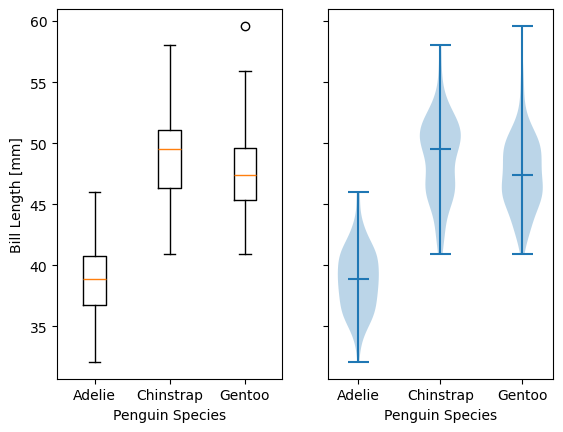

In [16]:
fig,axes = plt.subplots(ncols=2, sharey=True)
axes[0].boxplot( list(spbills.values()) )
axes[0].set_ylabel('Bill Length [mm]')
axes[1].violinplot( list(spbills.values()), showmedians=True)
for ax in axes:
    ax.set_xticks([x+1 for x in range(3)], labels=list(spbills.keys()) )
    ax.set_xlabel('Penguin Species')

In [56]:
pcts = 100*penguins['species'].value_counts()/len(penguins)
pcts = pcts.to_dict() #couldn't do this in 1 line

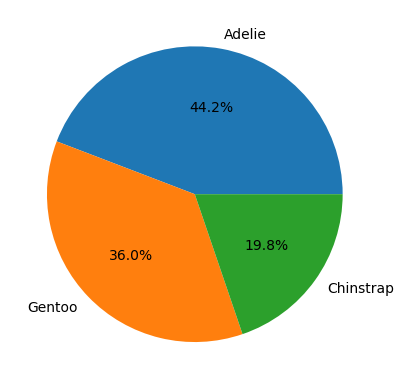

In [62]:
fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.pie(pcts.values(),labels=pcts.keys(),autopct='%1.1f%%')
plt.show()

### Plots for Gridded Data
- `.contour(X, Y, Z)` and `.contourf(X, Y, Z)` are nearly identical except that the former plots only line contours according to the height/intensity of `Z` on the grid `X,Y`, while the latter fills between the lines. The total integer number of equidistant levels or an array of specific level markers can be passed to the `levels` kwarg. The line contour function `contour()`, if assigned to a variable, has a `clabel()` method you can call to print the numerical value of each level along each of the contours.
- `.imshow(Z)` can plot a 2D intensity image, a $n\times m \times$3 stack of RGB images, or a  $n\times m \times$4 stack of RGB-A images (A is a fractional opacity value between 0 and 1), on a grid of rectangular pixels whose aspect ratio is determined by the `aspect` kwarg (default `'equal'`). Typically, one must set `origin='lower'` to render the image the right way up. If each pixel is an integer width in the desired units, one can use the `extent` kwarg to assign the coordinates, but this is generally less reliable than using, a standard geological map projection or an astronomical coordinate system structure, both of which require field-specific packages to set up a coordinate system specifier than Matplotlib can accept. There are also a number of interpolation methods for up- or down-sampling image data internally.
- `.pcolormesh(X, Y, Z)` is slower than `imshow` but gives more control over the shape of the grid. The allowed shapes of `Z` are the same. The grid pixels do not need to have right-angled corners or straight sides. 
- `.pcolor(X, Y, Z)` is a generalized version of `pcolormesh()` that allows one to pass masked grids `X` and `Y` in addition to masked images `Z`, but because of this it is much slower.
- `.barbs([X, Y,] U, V, [C])` is a specialized plot type for meteorologists that uses a bar with spikes and flags to indicate wind speed and direction.
- `.quiver([X, Y,] U, V, [C])` plots a 2D field of arrows whose size and length are proportional to the magnitudes of U and V. Including X and Y establishes a coordinate grid that lets one specify U and V in units of the grid, and C lets you assign the arrows a color map according to their magnitude.  
- `.streamplot([X, Y,] U, V)` draws streamlines of a vector flow with a streamline density controlled by the `density` kwarg.

For `barbs()`, `quiver()`, and `streamplot()`, `X,Y` are coordinates (optional), `U,V` are the mandatory x and y components of the vectors, and `C` is the color (optional). For all of the above where `X` and `Y` appear, `X` and `Y` must generally be computed with `np.meshgrid()`. I do a fairly extended demo of `quiver()` and `streamplot()` later, so I'll just demonstrate up to `barbs()`. I also have more detailed demos of `imshow()` and the 2 contour plotting functions later, but here I wanted to show some basics about annotating levels and adding colorbars as well.

In [241]:
#mock up some data
x = np.arange(-3.0, 3.0, 0.025)
y = np.arange(-2.0, 2.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

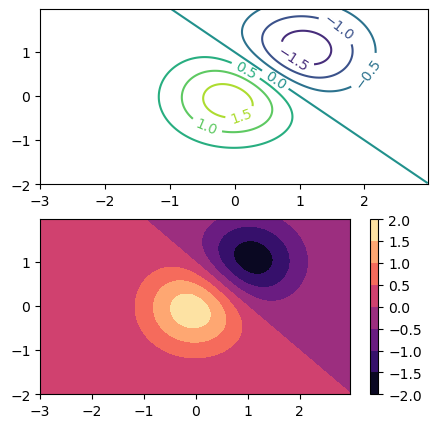

In [265]:
fig, axes=plt.subplots(nrows=2,figsize=(5,5))
CS = axes[0].contour(X,Y,Z)
axes[0].clabel(CS, inline=True, fontsize=10)
CF = axes[1].contourf(X,Y,Z, cmap=mpl.colormaps['magma'])
fig.colorbar(CF)

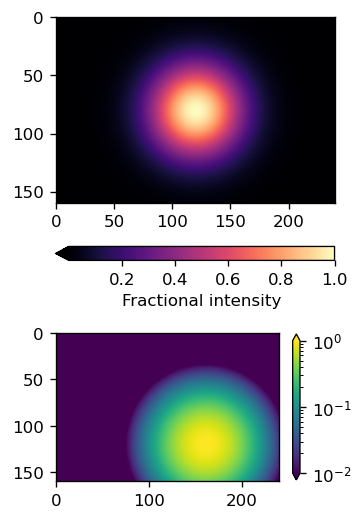

In [345]:
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               figsize=[3,6],
                               dpi=120)
plt.subplots_adjust(hspace=-0.1)
img1 = ax1.imshow(Z1, cmap='magma')
img2 = ax2.imshow(Z2, norm='log', vmin=0.01)
cbar1 = fig.colorbar(img1, ax=ax1, extend='min',
                     orientation='horizontal')
cbar1.set_label('Fractional intensity')

cbar2 = fig.colorbar(img2, ax=ax2, shrink=0.5,
                     extend='both')


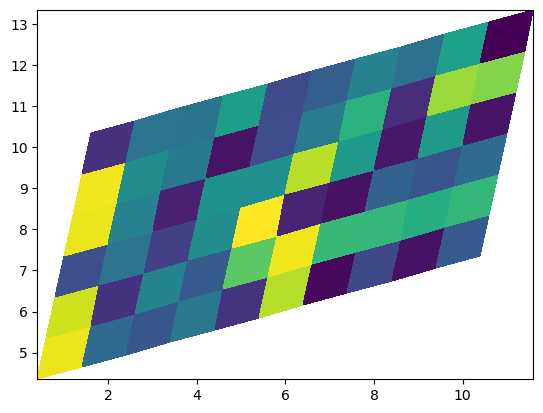

In [397]:
# 11x7 grid
Xs, Ys = np.meshgrid(np.arange(-0.5, 10, 1),
                     np.arange(4.5, 11, 1))
Xskew = Xs + 0.2 * Ys  # tilt the coordinates.
Yskew = Ys + 0.3 * Xs

fig, ax = plt.subplots()
ax.pcolormesh(Xskew, Yskew, np.random.rand(6, 10))

/tmp/ipykernel_6333/307438078.py:5: RuntimeWarning: invalid value encountered in power
  Yskew = Ys + 0.3 * Xs**0.75 # something in here causes a runtime error that pcolormesh can't handle


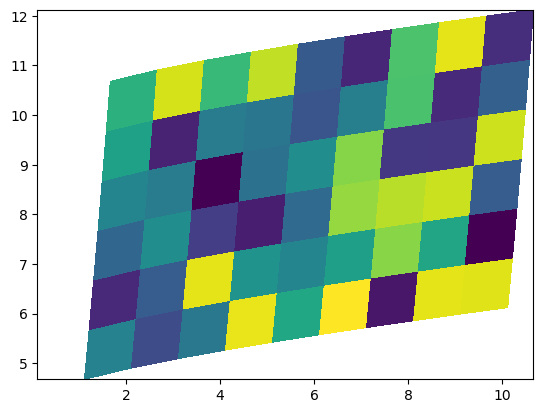

In [399]:
# 11x7 grid
Xs, Ys = np.meshgrid(np.arange(-0.5, 10, 1),
                     np.arange(4.5, 11, 1))
Xskew = Xs + 0.2 * Ys**0.75  # warp the coordinates.
Yskew = Ys + 0.3 * Xs**0.75 # something in here causes a runtime error that pcolormesh can't handle

fig, ax = plt.subplots()
ax.pcolor(Xskew, Yskew, np.random.rand(6, 10))

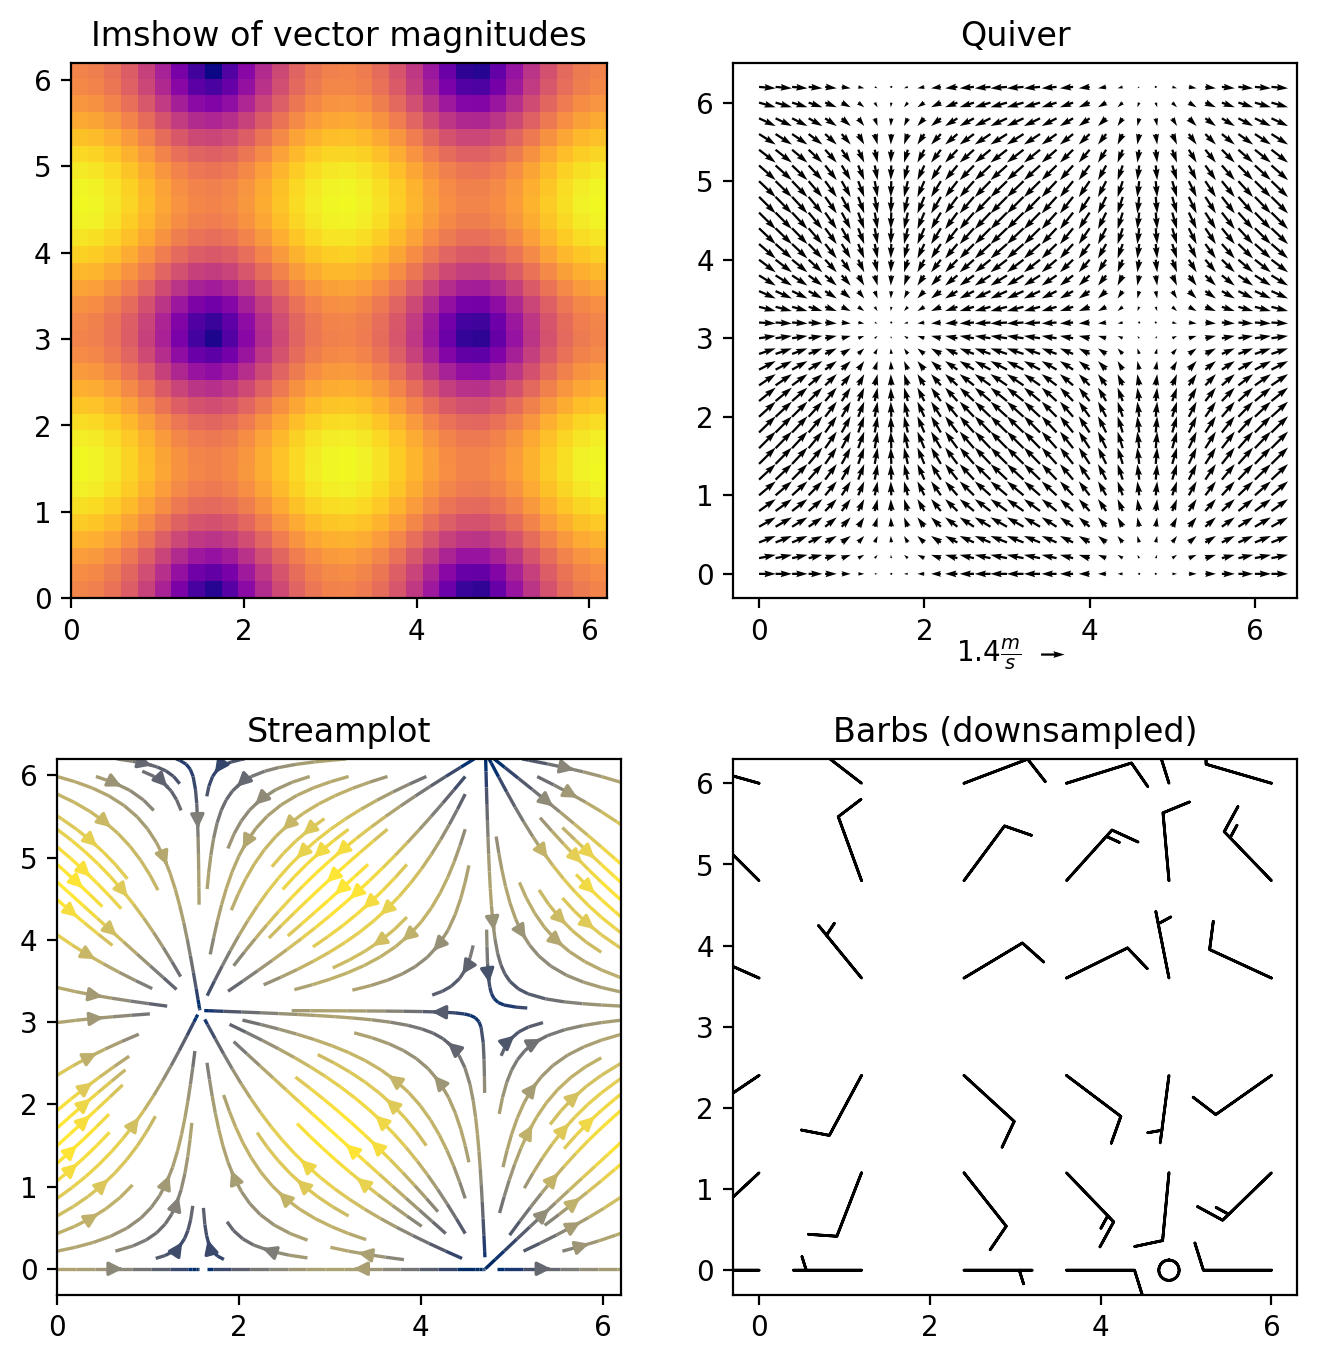

In [122]:
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

fig, axs = plt.subplots(ncols=2, nrows=2,dpi=200,figsize=(8,8))
fig.subplots_adjust(hspace=0.3)
M = np.hypot(U, V)
# Scale is inverse. Width is fraction of plot size; start around ~0.005

C2 = axs[0,0].imshow(M,cmap='plasma',
                     extent=[np.min(X),np.max(X),
                             np.min(Y),np.max(Y)])
axs[0,0].set_title('Imshow of vector magnitudes')

Q = axs[0,1].quiver(X, Y, U, V, scale_units='inches',scale=12,width=0.004)
qk = axs[0,1].quiverkey(Q, 0.74, 0.51, np.max(M),
                        r'${:.1f} \frac{{m}}{{s}}$'.format(np.max(M)),
                        labelpos='W',coordinates='figure')
#labelpos can be N, S, E, or W
axs[0,1].set_title('Quiver')

SP = axs[1,0].streamplot(X, Y, U, V, color=M, linewidth=1.2,cmap='cividis')
axs[1,0].set_title('Streamplot')

barbs = axs[1,1].barbs(X[::6,::6], Y[::6,::6],
                       10*U[::6,::6], 10*V[::6,::6])
axs[1,1].set_title('Barbs (downsampled)')

plt.show()

### Plots for Data on Irregular or Non-Cartesian Grids
Most of the following functions accept a `Triangulation` object in lieu of `x` and `y`, and indeed do the triangulation internally if `x` and `y` are provided. If you decide to provide your own triangulation, it will need to be computed with the `Triangulation` function of `matplotlib.tri`. `mpl.tri.Triangulation(x, y, triangles=None)` computes Delaunay triangles from `x` and `y` vertex coordinates if `triangles` is `None`, or takes an array of 3-tuples to specify the triangle sides from indexes of `x` and `y` in anticlockwise order.

- `.tricontour(Triangulation, z)` or `.tricontour(x, y, z)` draw contour lines (the number of which can be specified with the `levels` kwarg) on an unstructured triangular grid according to the intensity `z`.
- `.tricontourf(Triangulation, z)` or `.tricontourf(x, y, z)` are the same as the previous function except instead of dilineating the edges of each level with a thin line, every level is shaded across its full width.
- `.triplot(Triangulation)` or `.triplot(x, y)` draw only the edges of a triangular mesh.
- `.tripcolor(Triangulation, c)` or `.tripcolor(x, y, c)` shade the triangles of a triangular mesh according to the array `c` to generate a pseudocolor image whose "pixels" are triangles.

The latter 2 functions are also handy for plotting functions that are regular in a sense but not with respect to a Cartesian grid; their utility in that respect shines more in 3D.

The contouring functions might be tempting if you have scattered data, but if what you want to contour is point density, you're better off making a histogram or contouring a kernel density estimation. The `tricontour` and `tricontourf` functions are only for data where each triangle vertex is already associated with some z-value. Also be aware that if those z values are not highly correlated with their neighbors, the result will be ugly and probably not helpful as a communication tool. If you have something like a network graph where adjacent points are only weakly correlated or uncorrelated, a better choice would probably be to use the size and/or color of the node markers to indicate the z-values.

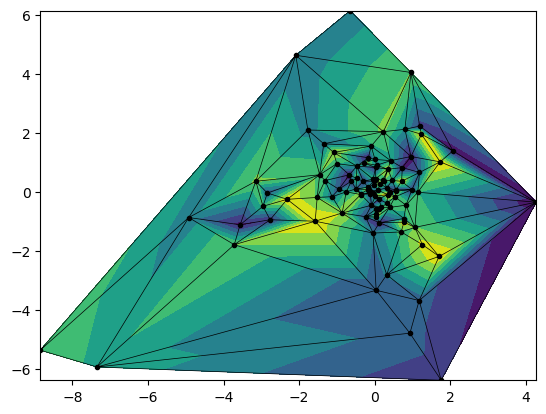

In [259]:
import matplotlib.tri as tri
#Mock up data of something that looks like vaguely like an epidemic or something similar
np.random.seed(19990101)
rads = np.random.lognormal(size=100)
angs = np.random.uniform(low=0.0, high=2*np.pi, size=100)
xs = (rads * np.cos(angs))
ys = (rads * np.sin(angs))
zs = np.random.randint(1,high=50, size=100)

fig,ax = plt.subplots()
ax.tricontourf(xs,ys,zs)
ax.triplot(xs,ys,'k.-', lw=0.5)
plt.show()

Text(0.5, 1.0, 'tripcolor')

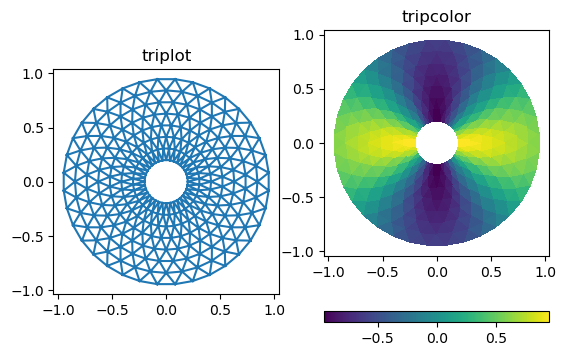

In [198]:
# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(2 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

#plotting
fig1, [ax0, ax1] = plt.subplots(ncols=2)
ax0.set_aspect('equal')
ax1.set_aspect('equal')
ax0.triplot(triang)
ax0.set_title('triplot')
tpc = ax1.tripcolor(triang, z, shading='flat') #also show shading='gouraud'
fig1.colorbar(tpc,orientation='horizontal')
ax1.set_title('tripcolor')

### Volumetric Plots

To render in 3D, all functions below must be plotted on figure with `fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})` or an axes instance with `ax = plt.subplot(nrows, ncols, index, projection = "3d")`:
- Many normally pairwise functions accept a 3rd parameter: `.scatter(x, y, z)`, `.plot(x, y, z)`, `.stem(x, y, z)`,`.errorbar(x, y, z)`, etc. For scattered data, it is preferred if you can draw a line from the point to some baseline, but `stem()` is not necessarily a good way to do this because of the formatting limitations and because there is no `zorder` kwarg that you can use to force points to appear above a base-level surface that is not at the bottom of the rendering box.
- `.voxels([x, y, z], filled)` (`filled` is a 3D boolean mask)
- `.plot_surface(X, Y, Z)` (`X`, `Y`, and `Z` are computed with `np.meshgrid()`)
- `.plot_wireframe(X, Y, Z)` (`X`, `Y`, and `Z` are computed with `np.meshgrid()`)
- `.plot_trisurf(x, y, z)`
- `.bar3d(x, y, bottom, width, depth, top, shade=True)`
- `.quiver(x, y, z, u, v, w)` where again, (x,y,z) define the arrow positions and (u,v,w) defines their directions.

Be aware that Matplotlib's algorithm for determining the relative depth of multiple 3D elements is error-prone, particularly in the non-interactive in-line display used by Jupyter. It's generally better to work on 3D graphics in a GUI (e.g. with Spyder, PyCharm, or VSCode) that lets you rotate the image to select the clearest angle anyway, but even then the rendering order may not be correct. Sometimes 2D projections are just safer.

Below is a sample of how `scatter(x,y,z)` handles depth, and how you can achieve something similar with `stem()` if you want your readers to be able to read off coordinates to some extent. The plots are of the positions of the Sun and its nearest 20 stellar neighbors. The z=0 plane is set at the level of the lowest star instead of the Sun for reasons that will become more apparent later, although you can already see some nonsensical overlapping in the stem plot.

Text(0.5, 0.92, 'Nearest 20 Stars (Scale in LY)')

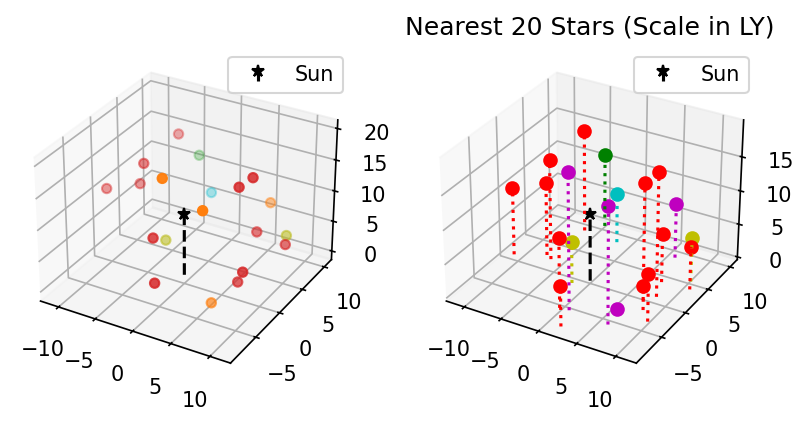

In [736]:
x,y,z,c = np.genfromtxt('solar_neighborhood.txt', encoding='ascii', 
                     dtype=[('x','<f8'),('y','<f8'),('z','<f8'), ('c','<U12')],
                     converters={3:lambda s: 'tab:'+str(s)}, unpack=True)

zsun = abs(min(z))
z = z+zsun

fig, axes = plt.subplots(ncols=2, subplot_kw = {"projection": "3d"}, dpi=150)
axes[0].scatter(x,y,z,c=list(c))

for clr in set(c):
    idx = np.where(c==clr)
    if 'orange' in clr:
        clr='m'
    elif 'olive' in clr:
        clr='y'
    else:
        clr=clr[4]
    axes[1].stem(x[idx],y[idx],z[idx], linefmt=str(clr+':'),
            markerfmt=str(clr+'o'),bottom=0.0, basefmt=" ")

for ax in axes:
    ax.stem([0],[0],[zsun], linefmt='k--',markerfmt='k*',
            bottom=0.0, basefmt=" ", label='Sun')
    ax.legend()
    
plt.title('Nearest 20 Stars (Scale in LY)')

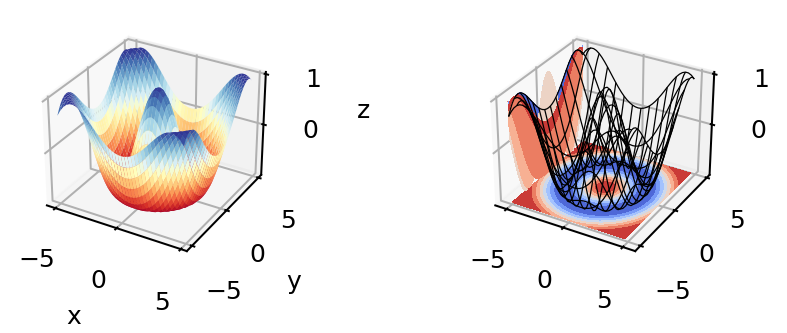

In [360]:
from matplotlib import cm

fig, axes = plt.subplots(ncols=2,
                         subplot_kw={"projection":"3d"},
                         dpi=180, figsize=(5,11))
fig.subplots_adjust(wspace=0.8)
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)

# Plot the surface.
surf = axes[0].plot_surface(X, Y, Z, cmap=cm.RdYlBu,
                            linewidth=1, antialiased=True)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_zlabel('z')
mesh = axes[1].plot_wireframe(X, Y, Z, color='k', linewidth = 0.5,
                              rstride=3, cstride=3)
axes[1].contourf(X, Y, Z, zdir='z', offset=-1, cmap='coolwarm')
axes[1].contourf(X, Y, Z, zdir='x', offset=-5, cmap='coolwarm')
#axes[1].contourf(X, Y, Z, zdir='y', offset=5, cmap='coolwarm')

You'll also see below that even though `quiver()` is capable of working in 3D, the results are cluttered and confusing, and the arrows are poorly drawn, so blunt that many of them do not clearly show which way they are pointing unless color artifacts accidentally change one or more line segments in the tips. My advice is to stick to 2D cuts or projections of vector fields for now.

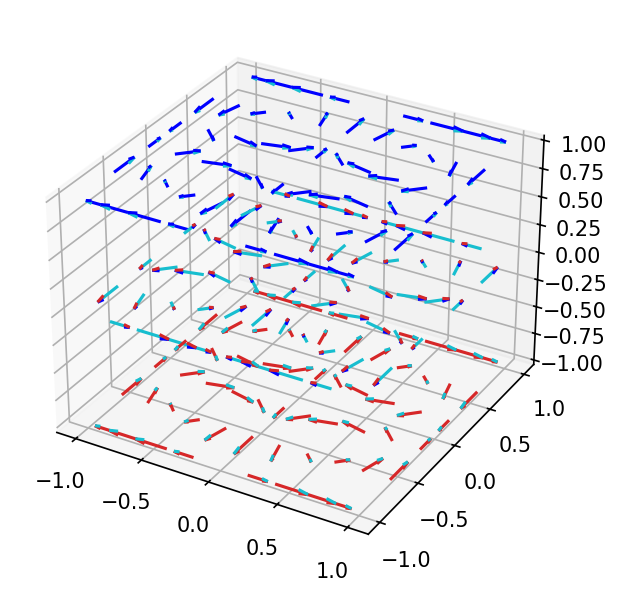

In [718]:
x, y, z = np.meshgrid(np.arange(-1, 1.2, 0.2),
                      np.arange(-1, 1.2, 0.4),
                      np.arange(-1, 1.5, 1))

# Make direction data for arrows
u = np.sin(np.pi*x)*np.cos(np.pi*y)*np.cos(np.pi*z)
v = -np.cos(np.pi*x)*np.sin(np.pi*y)*np.cos(np.pi*z)
w = (np.sqrt(0.75)*np.cos(np.pi*x)*np.cos(np.pi*y)*
     np.sin(np.pi*z))
# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},
                       dpi=150)
ax.quiver(x,y,z, u,v,w, length=0.25,
          color=['tab:red','tab:cyan','b'])
#, normalize=True)
#cmap is ignored and colors=cm.<cmap> raises an error

# I. Choosing a Plot Type
Some types of data have standard representations across most disciplines, such as:
- probabilities (histograms)
- budgets or fractions (proportional area charts, of which the pie chart is both best-known and worst at its job)
- spectra (line plots of measured intensity vs. wavelength frequency, or wavenumber)
- vector fields (quiver plots)
- elevation or intensity over an area (contour plots or intensity maps)

Many fields also often have standard ways of representing measurement data produced by the usual tools of their trade.

But often you derive parameters, produce simulations, or otherwise create data with a less obvious choice of representation. Alternatively, you may know what kind of plot you are *expected* to use, but struggle to make the data and format fit each other. Then what?

## Consider: **(<span style="color:darkorange">Dimensionality</span>, <span style="color:royalblue">Regularity</span>), (<span style="color:lightseagreen">Quantity</span>, <span style="color:crimson">Density</span>)**
In roughly that order.

### <span style="color:darkorange">Dimensionality</span> and <span style="color:royalblue">Regularity</span>

The greatest range of options (hardest choices) come with 3-4 dimensions or parameters. You could... 
- overplot with extra axes
- color-code scatter plots, bars, or PDF bins with a third parameter (examples below)
- use different markers, colors, or linestyles for qualitative variables
- have a 3-channel image with contours or markers on top
- etc., etc., etc.

Even if you have a bunch of count data in different qualitative bins, if some of those qualitative parameters intersect, there are still many options for combining the data so that the whole tells a richer story than the sum of the parts.

Let's start with a non-example: **Why should you NOT use pie or donut charts?** Per many data science consultancy studies and other institutions...[\[1\]](https://scc.ms.unimelb.edu.au/resources/data-visualisation-and-exploration/no_pie-charts)[\[2\]](https://accelerate.uofuhealth.utah.edu/improvement/steves-dojo-7-the-case-against-pie-charts)

   - Pie and donut charts take up too much space for their limited information content.
   - Hard to add other parameters except by grouped colors.
   - Humans are better at judging relative lengths than angles $\to$ hard to compare between and within pie charts.
   - Pie charts are easier to read when categories are ordered by size, which may conflict with more natural arrangements, e.g. alphabetically or by numerical brackets.
   - Quantities of each part and their relative values are generally more important to communicate than states of belonging.

If you only care about communicating rough fractional values and the whole has no more than 4 parts of very different sizes, miniature pie charts could be useful as, say, markers on a map [(old Matplotlib example here)](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_piecharts.html). However, if you want the relative values to be immediately *and precisely* readable, *stacked bar plots, treemaps, and waffle plots are better.*

Even if you don't recognize Treemaps and Waffle charts by name, I guarantee you've seen them before. Infographic producers love them.

Treemap:
![treemap - OK employment by industry](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Treemap_of_Employment_by_Industry_in_Oklahoma_%282020%29.png/1280px-Treemap_of_Employment_by_Industry_in_Oklahoma_%282020%29.png)
Notice this layout gives more, and clearer, options for how to add subgroups.

Waffle Chart:
![waffle plot example](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*UKTLeO11a51ntYV_hmYGjw.png)(source: https://towardsdatascience.com/how-to-create-beautiful-waffle-charts-for-data-visualisation-in-python-e9760a3f8594)

Unfortunately, of these, Matplotlib currently only supports stacked bar plots, [with a good demo (albeit with some questionable text color choices) presented here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#). However, there are well-documented add-ons like [Squarify](https://github.com/laserson/squarify) ([more examples here](https://python-charts.com/part-whole/treemap-matplotlib/)) and [PyWaffle](https://github.com/gyli/PyWaffle) ([more examples here](https://python-charts.com/part-whole/waffle-chart-matplotlib/)) that will help you make treemaps and waffle plots, respectively.

For comparison, and to show a couple of annotation styles, I'll start with a pie chart of the Kaggle Titanic training dataset *(Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic).* Then I'll show a couple of ways one might redo these data as bar charts.

In [17]:
# Don't worry about how I load these. It's just for display purposes.
df = pd.read_csv('titanic_train.csv')
print((df.groupby(['Sex','Pclass','Survived']))['PassengerId'].count(), '\n')
print('# survivors =',df['Survived'].sum(), 'out of', df['PassengerId'].count(), 'passengers.')
live = {'f': np.array([141, 100, 144]), 'm': np.array([45, 17,47])}
live_sum = df['Survived'].sum()
dead = {'f': np.array([3, 6, 72]), 'm': np.array([77, 91, 300])}
dead_sum = df['PassengerId'].loc[df['Survived']==0].count()
print(dead_sum)
lbls=['F, 1st','F, 2nd','F, 3rd','M, 1st','M, 2nd','M, 3rd']

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: PassengerId, dtype: int64 

# survivors = 342 out of 891 passengers.
549


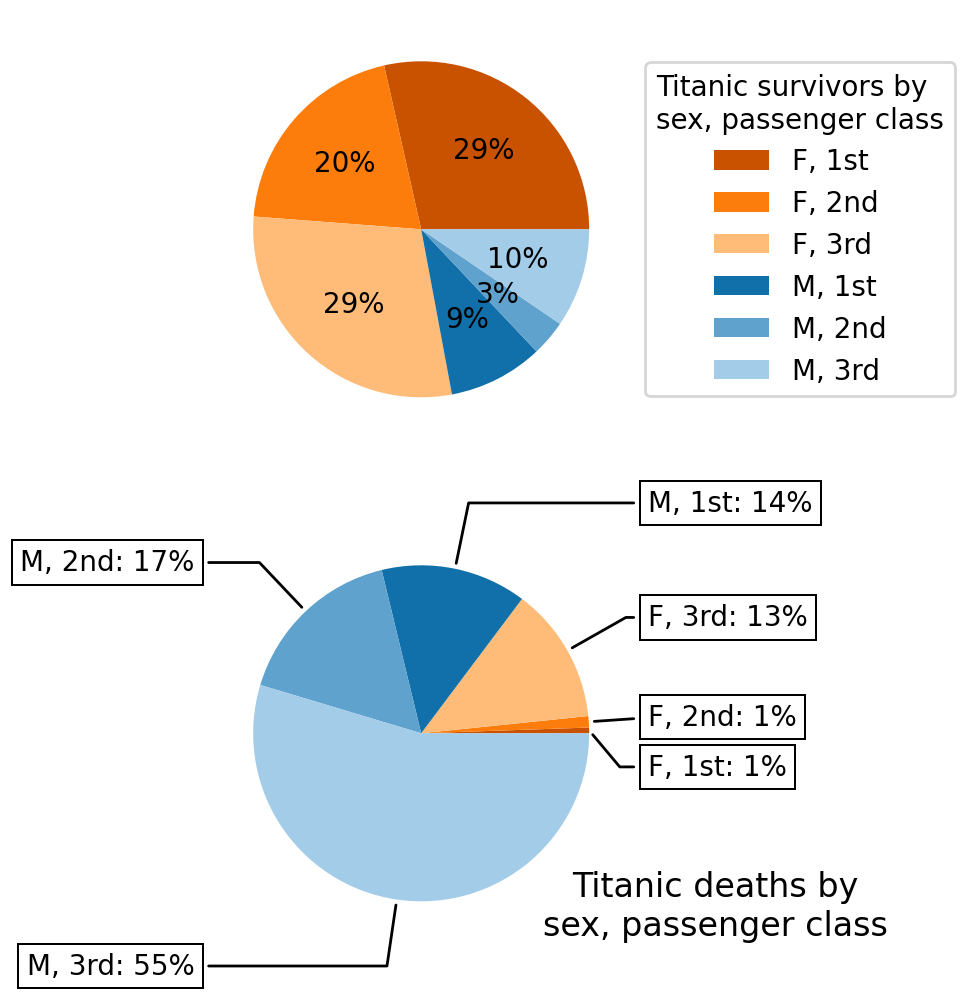

In [18]:
fig, [axL,axD] = plt.subplots(nrows=2, figsize=(6, 6), dpi=200)
wedgesL, textsL, autotextsL = axL.pie(np.concatenate((live['f'],live['m'])),
                                      autopct='%1.0f%%',
                                    colors = ['#c85200','#fc7d0b','#ffbc79',
                                              '#1170aa','#5fa2ce','#a3cce9'])
axL.legend(wedgesL, lbls,
          title="Titanic survivors by\nsex, passenger class",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
wedgesD, textsD = axD.pie(np.concatenate((dead['f'],dead['m'])),
               colors = ['#c85200','#fc7d0b','#ffbc79',
                         '#1170aa','#5fa2ce','#a3cce9'])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
deadf = np.concatenate((dead['f'],dead['m']))/dead_sum
for i, p in enumerate(wedgesD):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    if i==0:
        kw["arrowprops"].update({"connectionstyle": f"angle,angleA=180,angleB=310"})
        axD.annotate(lbls[i]+': {:.0%}'.format(deadf[i]), xy= (x,y),
                     xytext=(1.35, -0.2),
                     horizontalalignment=horizontalalignment, **kw)
    else:
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        axD.annotate(lbls[i]+': {:.0%}'.format(deadf[i]), xy=(x, y),
                     xytext=(1.35*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)
axD.set_title("Titanic deaths by\nsex, passenger class", y=0, x=1.2, pad=3)
plt.show()
# Arrowprops notes: arrow goes from text to coords
# AngleA is initial angle of line coming from text relative to due East (right)
# AngleB is angle of line as measured from the opposite end, where it meets the annotated point
# x range: [-1.5,1.5] ish,
# y range: [-1,1], but lord help you if you try 0.7 with the angles wrong.

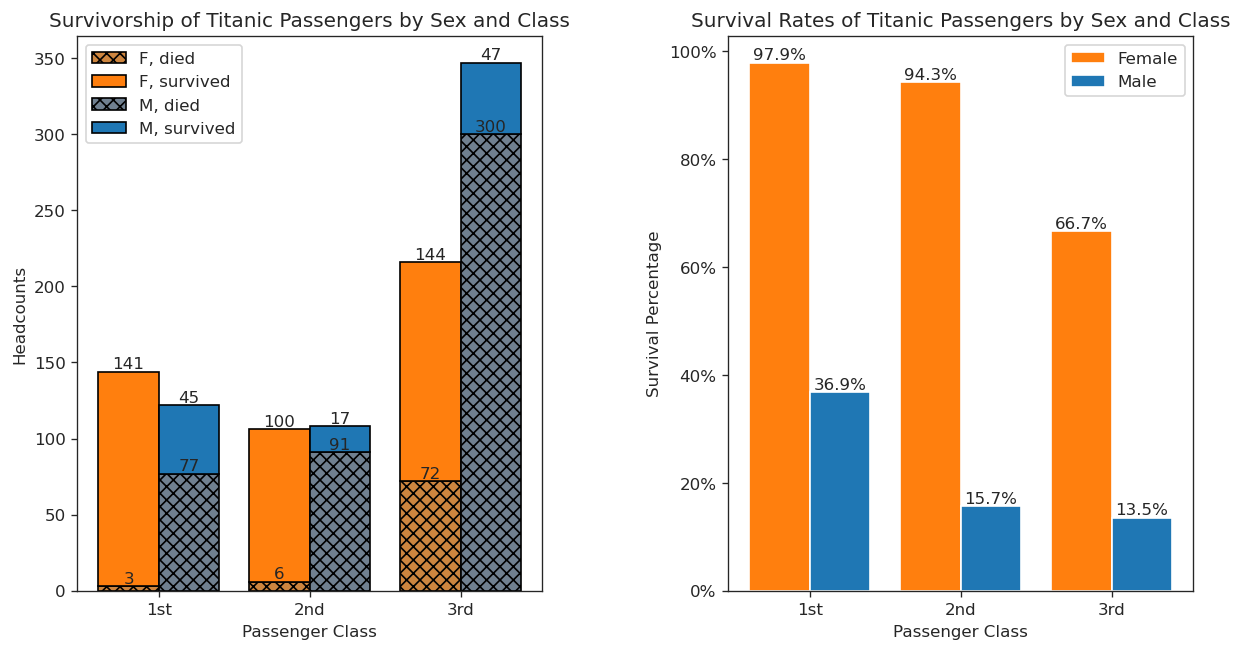

In [34]:
# # Don't worry about how I load these. It's just for display purposes.
# df = pd.read_csv('titanic_train.csv')
# print((df.groupby(['Sex','Pclass','Survived']))['PassengerId'].count(), '\n')
# print('# survivors =',df['Survived'].sum(), 'out of', df['PassengerId'].count(), 'passengers.')
# live = {'f': np.array([91, 70, 77]), 'm': np.array([45, 17,47])}
# live_sum = df['Survived'].sum()
# dead = {'f': np.array([3, 6, 72]), 'm': np.array([77, 91, 300])}
# dead_sum = df['PassengerId'].loc[df['Survived']==0].count()
# print(dead_sum)
# lbls=['F, 1st','F, 2nd','F, 3rd','M, 1st','M, 2nd','M, 3rd']

fig, (ax1,ax2) = plt.subplots(dpi=120,figsize=(12,6),ncols=2)
plt.subplots_adjust(wspace=0.4)
x = np.arange(3)  # classes
width = 0.4  # the width of the bars (there will be 2)
multiplier = 0

for sex, npclass in dead.items():
    offset = width * multiplier
    dead_recs = ax1.bar(x + offset, npclass, width, label=sex.capitalize()+', died', ec='k',
                       color='slategrey' if sex == 'm' else 'peru', hatch='xxx')
    ax1.bar_label(dead_recs, padding=0)
    live_recs = ax1.bar(x + offset, live[sex], width, label=sex.capitalize()+', survived', ec='k',
                       color='tab:blue' if sex == 'm' else 'tab:orange', bottom=npclass)
    ax1.bar_label(live_recs, padding=0, labels=live[sex])
    multiplier += 1

ax1.set_xticks(x+0.5*offset, ['1st','2nd','3rd'])
ax1.set_title('Survivorship of Titanic Passengers by Sex and Class')
ax1.set_xlabel("Passenger Class")
ax1.set_ylabel("Headcounts")
ax1.legend()

x = np.arange(3)  # classes
width = 0.4  # the width of the bars (there will be 2)
multiplier = 0

for sex, npclass in live.items():
    offset = width * multiplier
    pcts =  npclass/(npclass+dead[sex])
    live_recs = ax2.bar(x + offset, pcts, width,
                       label='Male' if sex =='m' else 'Female',
                       color='tab:blue' if sex == 'm' else 'tab:orange')
    ax2.bar_label(live_recs, labels = ['{:.1%}'.format(p) for p in pcts])
    multiplier += 1
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
ax2.set_xticks(x+0.5*offset, ['1st','2nd','3rd'])
ax2.set_title('Survival Rates of Titanic Passengers by Sex and Class')
ax2.set_xlabel("Passenger Class")
ax2.set_ylabel("Survival Percentage")
ax2.legend()
plt.show()

Having a larger number of dimensions/parameters can make your choice easier (note: I did not say "less painful"), because:
- Display options that can accommodate all variables are more limited.
- ***Journals have hard size and resolution limits.***

For 4-6 numerical parameters, if your data are scattered or include anything from Markov Chain Monte-Carlo (MCMC) simulations, they will usually end up on a corner plot or pair grid, like the following examples:

![Corner Plot](corner_demo.png)
This is a standard format for plotting the marginal posterior distributions of model parameters that result from MCMC methods, regardless of the size of your parameter space. This is a demo image from the documentation of the **`corner.py`** module, which is a lightweight extra package that depends only on NumPy, SciPy, and Matplotlib.

Even if you don't work with MCMC methods, I recommend this package because it handles both extremely dense concentrations of data and sparse but significant outliers. Note the switch between displaying a contoured histogram and individual points at an internally computed point density threshold. It also has a `hist2d()` submodule so you can use this feature on a more conventional pairwise plot.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


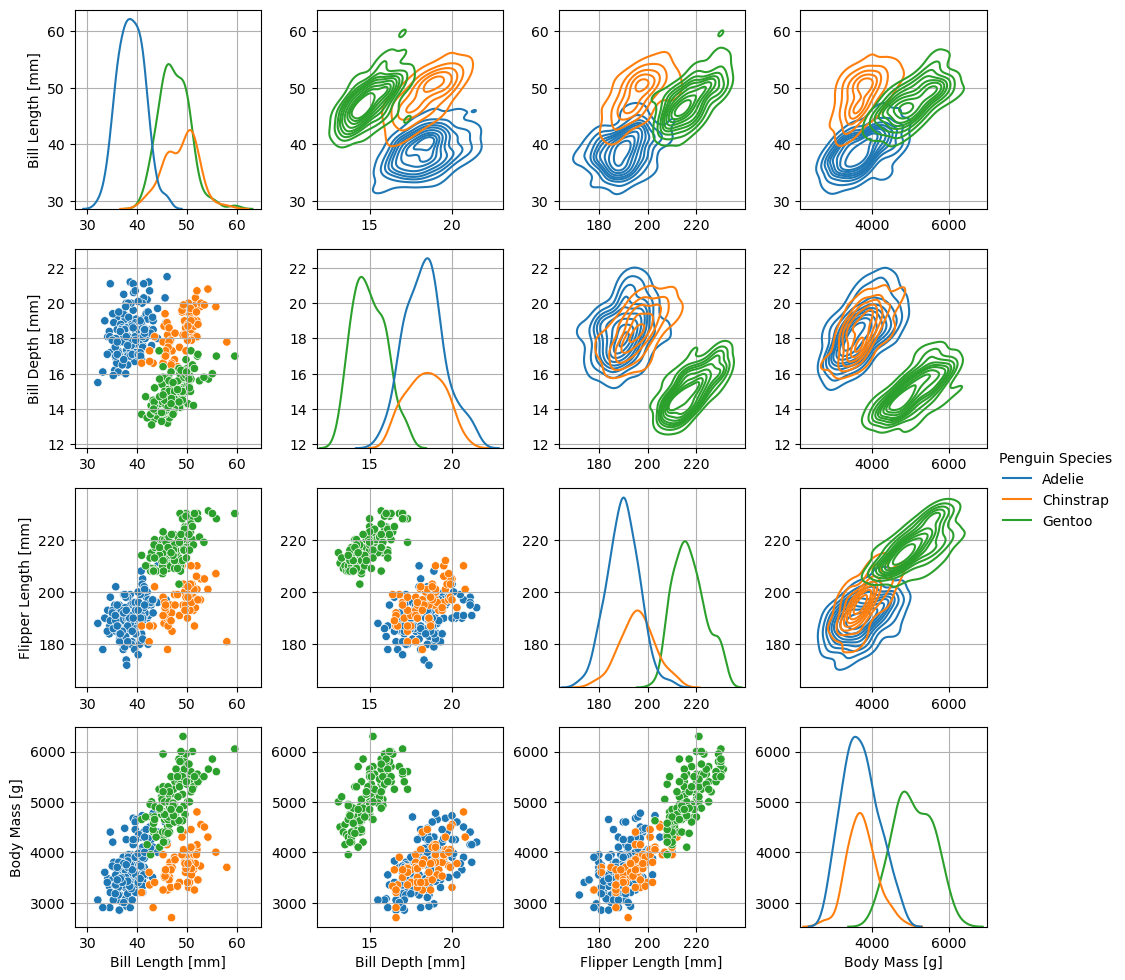

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline
# I will give a tutorial on Pandas later; the exercise notebooks will have
#   any necessary pandas commands already included
import pandas as pd
import seaborn as sb

penguins = sb.load_dataset("penguins")
print(penguins.head()) #standard preview function for pandas dataframes

g = sb.PairGrid(penguins, hue='species', diag_sharey=False, #corner=True,
               despine=False)
g.map_lower(sb.scatterplot)
g.map_diag(sb.kdeplot)
g.map_upper(sb.kdeplot)
g.add_legend(title='Penguin Species',loc='center right')#,fontsize=14)
sb.set_style('ticks')
plt.subplots_adjust(wspace=0.3, hspace=0.2)

#These commands are just to make the axis labels look better
#  x-axis labels are None except on bottom axis
#string.capwords is better than str.title() because it only capitalizes
#  the first letter after a space, so the units as I've formatted them
#  are ignored
import string
for i in range(4):
    for j in range(4):
        try:
            xlabel = g.axes[i,j].xaxis.get_label_text()
            ylabel = g.axes[i,j].yaxis.get_label_text()
            g.axes[i,j].set_xlabel(string.capwords(xlabel.replace('_',' ')
                                                   .replace('mm','[mm]')
                                                   .replace(' g',' [g]')))
            g.axes[i,j].set_ylabel(string.capwords(ylabel.replace('_',' ')
                                                   .replace('mm','[mm]')
                                                   .replace(' g',' [g]')))
            g.axes[i,j].tick_params(axis='both',
                                    labelleft=True, labelbottom=True)
            g.axes[i,j].grid()
        except AttributeError:
            pass

This plot is produced with the [**Seaborn** statistical data visualization package](https://seaborn.pydata.org/generated/seaborn.PairGrid.html), which I highly recommend, especially if you use Pandas. This Pair-Grid format is great if you have several numerical variables and one very important categorical variable (e.g. species, sex, ticket class, chemical bond type, ...) with no more than a handful of unique values. 

There are many format options for both the single-parameter probability distributions on the diagonal and the joint distributions on the off-diagonals. The downside is that many settings are hardcoded and difficult to change.

#### **The Population Dimension**
The pair grid above comfortably fits 3 populations, but what if you had double that number? What if you have more discrete populations or sample groups than numerical parameters, or you want to easily compare means, medians, and dispersions of a single parameter between populations? Layering or stacking histograms (or their smoother KDE counterparts) can quickly get messy; a couple of good alternatives are box-and-whisker plots (a.k.a. box plots) and violin plots. Box plots have a longer history and so may be better for press releases or presentations to industry partners with less scientific background. Violin plots, however, are more information-dense and so are becoming the preferred format in scientific journals and presentations to other scientists.

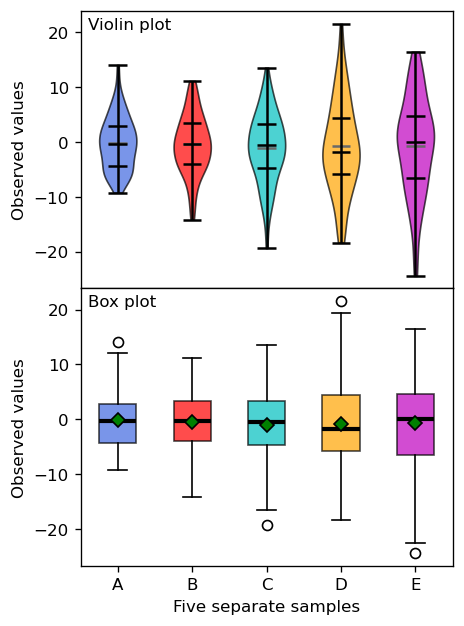

In [210]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True,
                        figsize=(4, 6), dpi=120)
fig.subplots_adjust(hspace=0)
# Fixing random state for reproducibility
np.random.seed(19700101)

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(5, 10)]

# 1. plot violin plot with some customization
vplot = axs[0].violinplot(all_data, showmeans=True,showmedians=True,
                          quantiles=[[0.25,0.75],[0.25,0.75],
                                     [0.25,0.75],[0.25,0.75],
                                     [0.25,0.75]])
for v,c in zip(vplot['bodies'],['royalblue','r','c','orange','m']):
    v.set_facecolor(c)
    v.set_edgecolor('k')  #have to set whisker colors 1-by-1
    v.set_alpha(0.7)
for k in ['cmins','cmaxes','cmedians', 'cquantiles','cbars']:
    vplot[k].set_edgecolor('k')
vplot['cmeans'].set_edgecolor('dimgray')
axs[0].set_title('Violin plot', loc='left', y=0.9, x=0.02,
             fontsize='medium')

# 2. plot box plot with customization
medianprops = dict(linestyle='-', linewidth=2.5, color='k')
meanptprops = dict(marker='D', markeredgecolor='k',
                      markerfacecolor='g')
bplot = axs[1].boxplot(all_data, patch_artist=True,  showmeans=True,
                       medianprops=medianprops, meanprops=meanptprops)
for patch, c in zip(bplot['boxes'],['royalblue','r','c','orange','m']):
    patch.set_facecolor(c)
    patch.set_alpha(0.7)

axs[1].set_title('Box plot', loc='left', y=0.9, x=0.02,
             fontsize='medium')

axs[1].set_xlabel('Five separate samples')

for ax in axs:
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['A', 'B', 'C', 'D', 'E'])
    ax.set_ylabel('Observed values')

Note the customization options I've used. The default for violin plots is for the lines to all be a medium blue with pale blue violin bodies (smoothed bidirectional histograms), which in my opinion is too low-contrast. For box plots, the default setting is for the boxes to not have any fill color, for the median lines to be orange, and if a mean is shown, it is rendered as a green triangle. Quantiles are not usually shown but can be made visible in several ways.

In both cases, I believe it is easier to distinguish the sample groups and keep them straight in the mind if they are each a different color, hence I've set a different face color for every violin and box. This may not be practical for a much larger number of distinct groups or a very small figure, but with fewer than 10 populations and sufficient space, it should be doable. Doing this means you have to change the default median (and mean) lines and/or marker colors, and the best choice then is typically something neutral. For a light fill color, a thick black median line is a good choice. If you choose to show the mean, a dark grey line is easy to implement for a violin plot, although the violins themselves then need to be a reasonably light or bright color. The box plot function lets you choose whether to show the mean (or median for that matter) as a line segment or a marker, and in this case a marker, with e.g. a black outline and white fill, is more readily distinguished from the standard markings. **Style tip:** If you choose to show the mean, median, *and* quantiles all at once, the median and other quantiles should be the same style since the median by definition is at the 50th percentile point, and the mean should be a different color or style to set it apart. It is reasonable to use the same style for the median, quantiles, and caps because the caps represent the upper and lower limits (100th and 0th percentiles, respectively), not the standard deviation or variance.

Both the `boxplot()` and `violinplot()` functions return dictionaries of components of the plot that can be customized. You can also pass dictionaries of properties to `boxplot()` in particular to set the face and edge colors of the boxes, change the markers for the median and mean lines, and more. The parameters  available to modify are split over [the Returns section and Other Parameters section of the box plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html); for the specifics on which ones to use, I refer readers to [this box plot customization example set](https://matplotlib.org/stable/gallery/statistics/boxplot.html#sphx-glr-gallery-statistics-boxplot-py). For better or worse, every line element of a violin plot is a separate dictionary key, along with the `'bodies'` key, which is a list of the PolyCollection instances containing the filled area of each violin. The other keys are [exactly as described in the Returns section of the violin plot documentation,](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html#matplotlib.axes.Axes.violinplot) except for the`'cquantiles'` key, which is only defined if the `quantiles` kwarg is also defined. The quantiles must be given for every violin separately even if they are all the same.

In [137]:
bplot.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

#### **Larger-ND Parameter Spaces**
For still-larger parameter spaces ($8\lesssim n_{\rm{dim}}\lesssim30$), even corner plots can quickly become unfeasible. That further reduces your options, and **should raise questions over whether plotting that many variables together is either necessary or desirable.**

If you decide it is necessary, e.g., to show readers how and why you chose a small subset of parameters to study in more detail, you could show a heat map of correlation coefficients in lieu of a more detailed corner plot.

Depending on the format of your data and how much control you want over the appearance of the plot, you could use either `imshow()` or `pcolormesh()` in Matplotlib, or Seaborn's `heatmap()`.

* `imshow()` and `pcolormesh` give you more color, text, and other formatting options, and there is [boilerplate code with docstrings in the Matplotlib docs](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) which I've saved to `imshow_heatmap.py` for you to import as part of an exercise.

* If you're familiar with Pandas, computing the correlation coefficients and plotting them with `heatmap()` is more straightforward (see below). But again, you then have to deal with Seaborn's formatting, which is geared more toward digital presentations and infographics than for publication.

(33, 33)


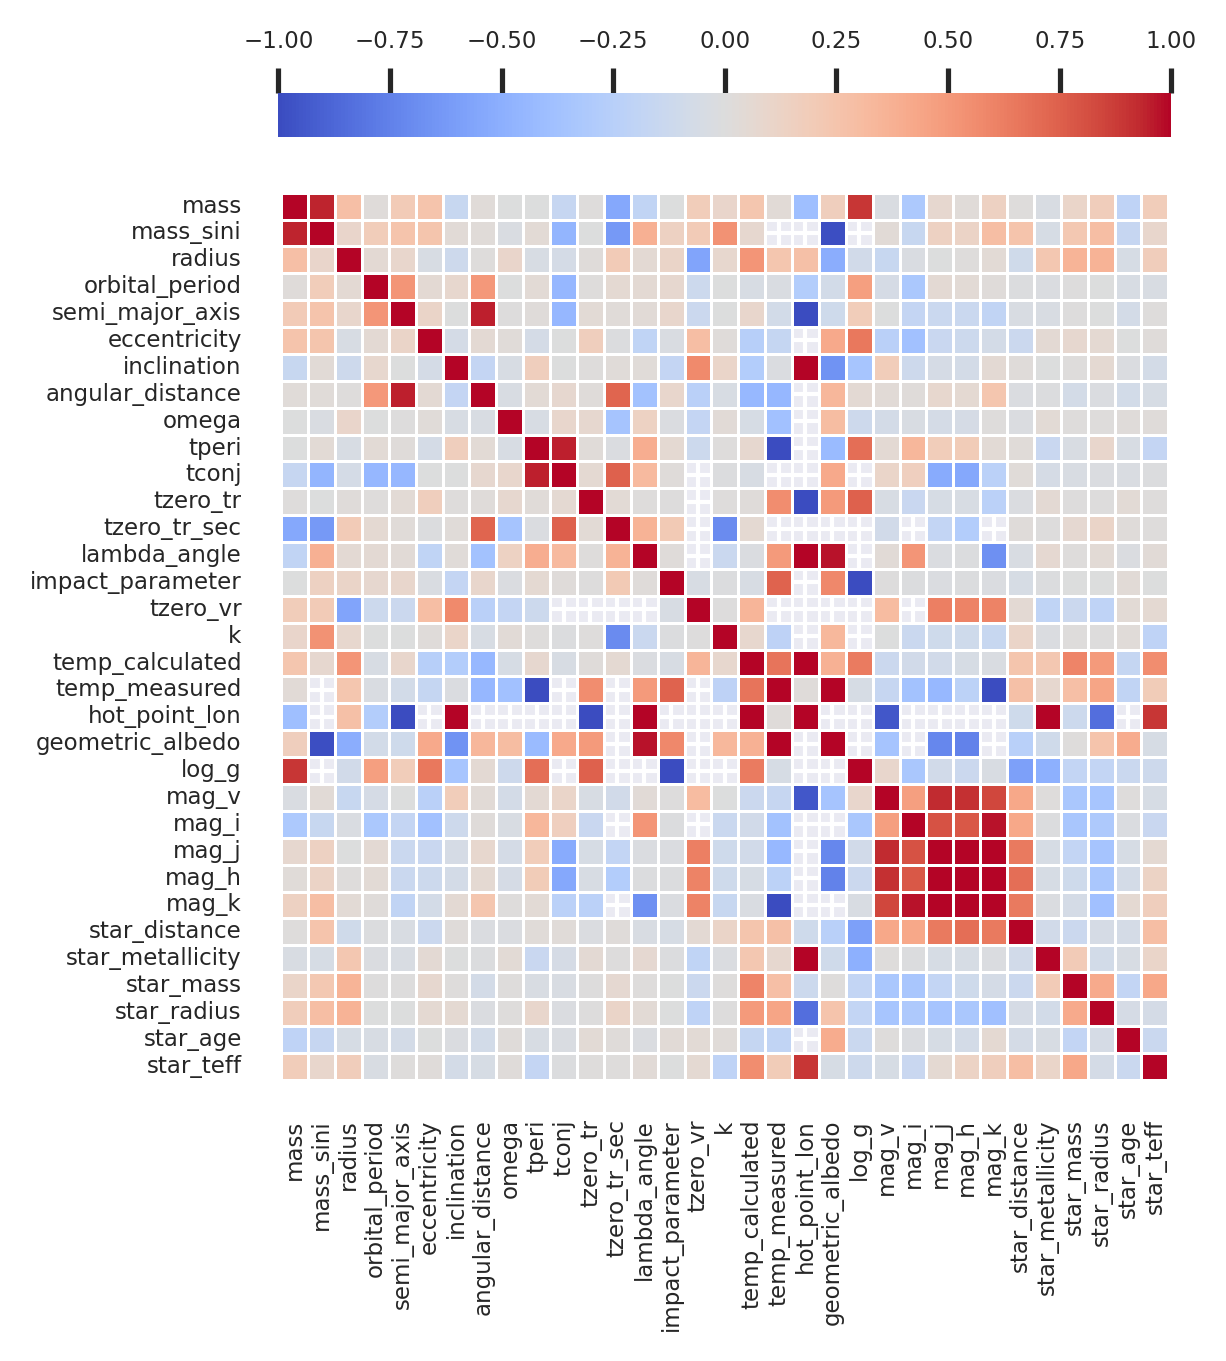

In [69]:
#note that this is a different file than the one in the exercise.
# I used it so it'd load lots of parameters:
import requests
url='https://exoplanet.eu/catalog/csv/'
exops = pd.read_csv(url) #98 columns!
dropkeys = [title for title in exops.columns if
            'error' in title or 'name' in title]
exops1=exops.drop(columns=[*dropkeys,'planet_status','ra','dec',
                           'discovered']) #paring columns down
corrs=exops1.corr(numeric_only=True)
print(corrs.shape) # = 33 x 33

plt.figure(dpi=300)
sb.set_style('ticks')
sb.set(font_scale=0.5)
sb.heatmap(corrs, cmap="coolwarm", annot=False, linewidth=.3,
           cbar_kws={'shrink':0.6, 'location':'top'},
           xticklabels=True, yticklabels=True, square=True)
plt.show()

Either way, this approach also has an upper limit dictated by typical print and font sizes. As I will show later, you will not be able to display more than about 30 parameters. 

You also really *shouldn't* display more than can be shown with the correlation coefficients reported on the squares. A figure as dense as the one above is hard to read without a ruler to help keep your eye on the same line all the way across, and does not allow comparison of parameters with similar correlation coefficients that are not adjacent on the plot.

A plot like the above is best used behind the scenes to help you choose which parameters not to show in publication when you don't already know which are degenerate or which are uninformative to the quantities you care most about.

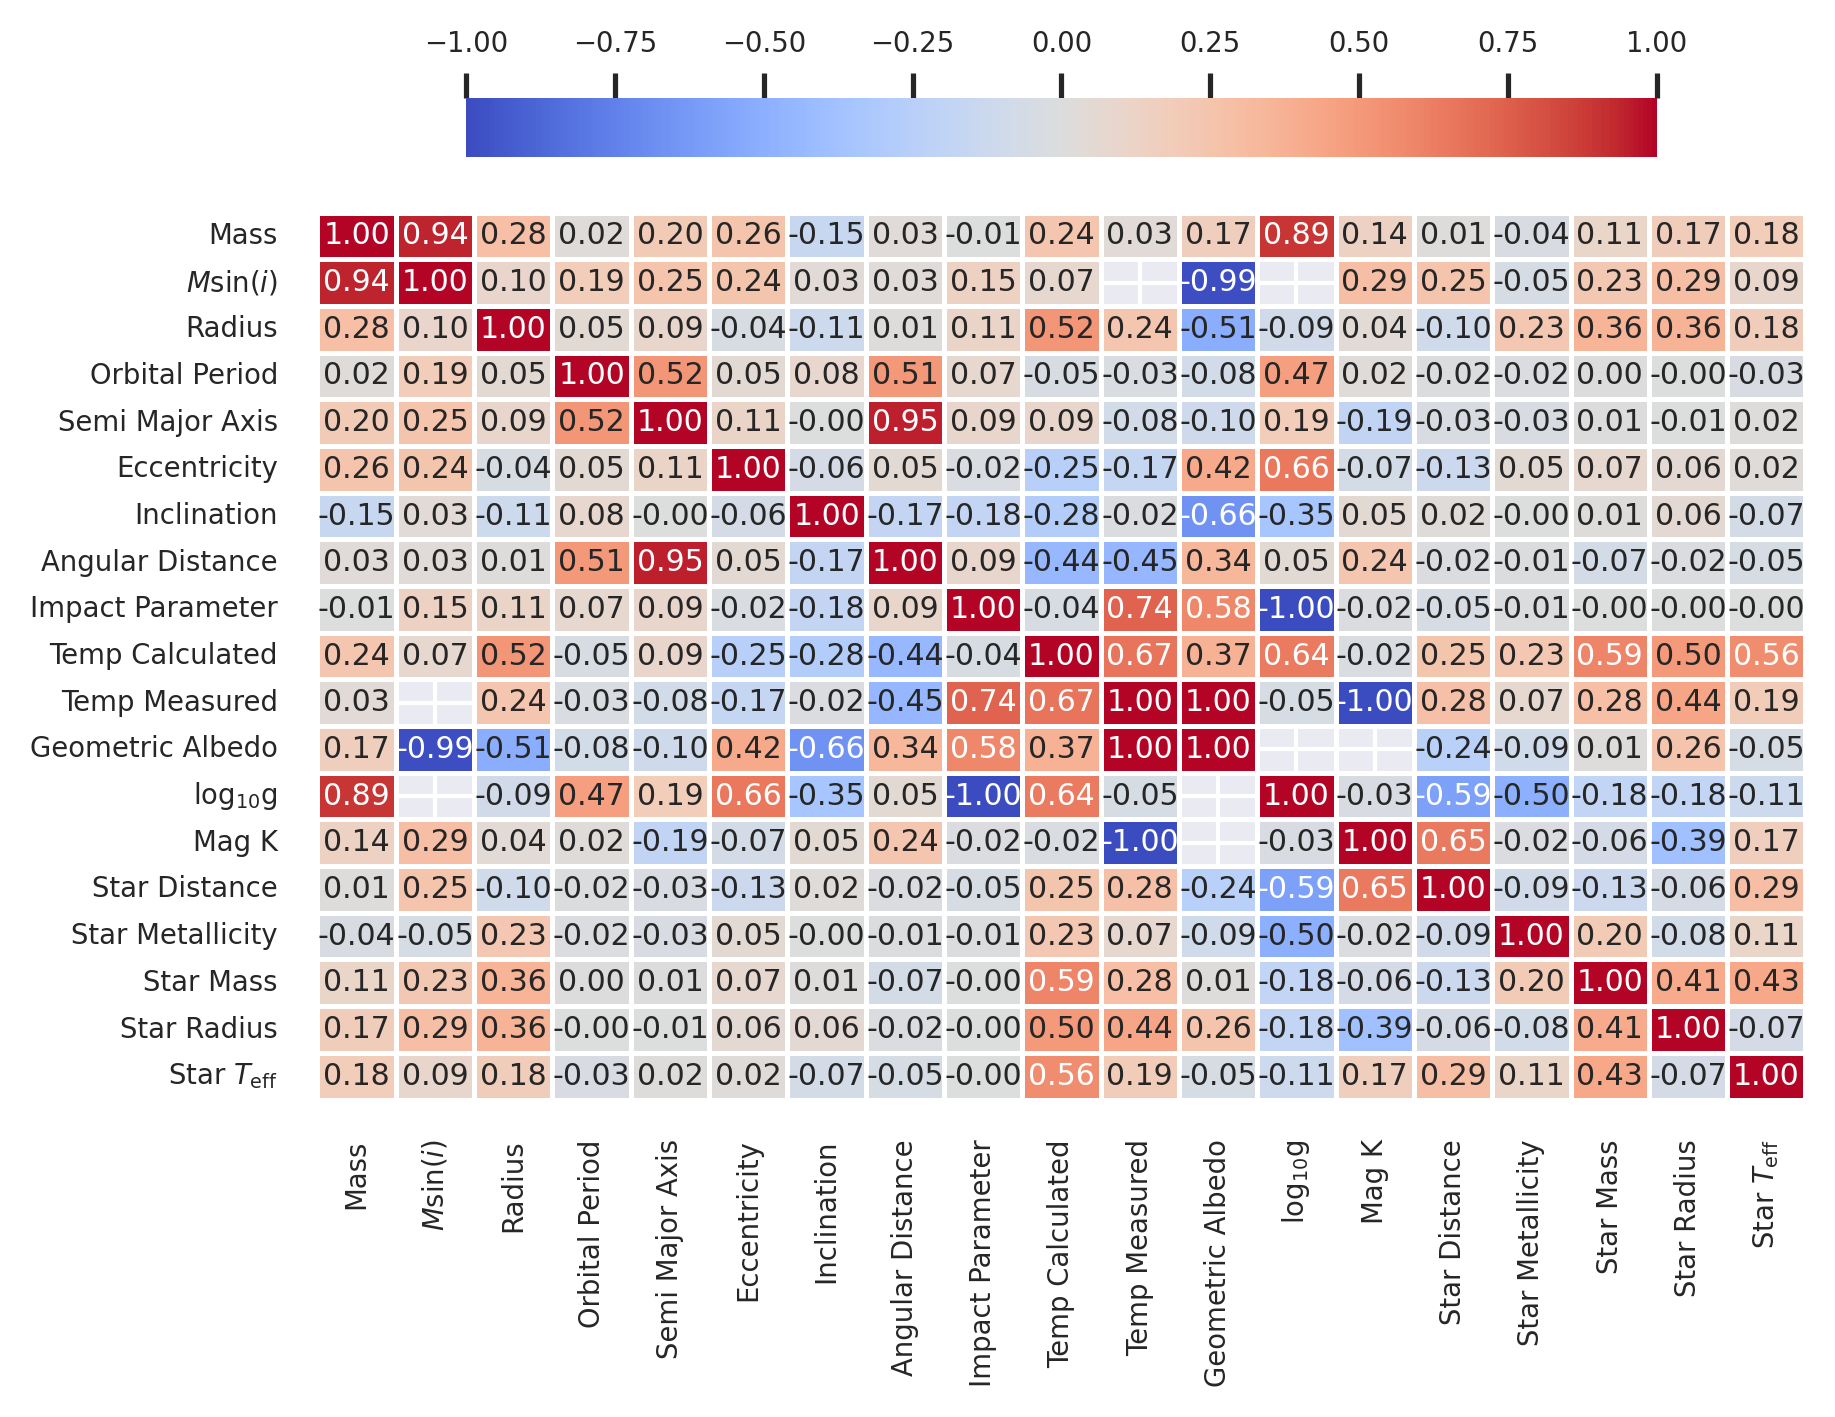

In [70]:
dropkeys2 = [title for title in exops1.columns if
            'tzero' in title or 'mag_' in title]
exops2=exops1.drop(columns=[*dropkeys2[:-1],'tperi','tconj','omega',
                           'star_age','hot_point_lon','lambda_angle','k'])
corrs2=exops2.corr(numeric_only=True) # 19 x 19

annot_labels = np.ma.masked_inside(corrs2.to_numpy(),-0.1,0.1)
replacers = {'Mass Sini':r'$M$sin($i$)', 'Log G':r'log$_{{10}}$g',
             'Teff':r'$T_{{\mathrm{{eff}}}}$'}
axlabs = corrs2.columns.to_numpy()
for i,lbl in enumerate(axlabs):
    axlabs[i] = string.capwords(lbl.replace('_',' '))\
                .replace('Mass Sini',r'$M$sin($i$)')\
                .replace('Log G',r'log$_{{10}}$g')\
                .replace('Teff',r'$T_{{\mathrm{{eff}}}}$')

plt.figure(dpi=300)
sb.set(font_scale=0.6)
hm = sb.heatmap(corrs2, cmap="coolwarm", annot=annot_labels,fmt='.2f',
           linewidth=0.75, cbar_kws={'shrink':0.8, 'location':'top'},
           xticklabels=axlabs, yticklabels=axlabs, square=False)
sb.set_style('ticks')
plt.show()
sb.set(font_scale=1)

Worth noting, heatmap at least has a built-in method to replace axis tick labels (i.e. row and column labels) with typeset versions. However, using LaTeX with `str.replace()` introduces several complications that you need to watch out for, because there is a `str.format()` command under the hood:
- Using dictionaries of 'Original':'Replacement' is disallowed - attempting to do so raises `TypeError: unsupported format string passed to generator.__format__`
- All of the syntax quirks for making Matplotlib work with LaTeX, which are discussed at length in Part II, "Matplotlib and LaTeX", apply here.
- Strings that are special characters in LaTeX like `_` and `^` can't be replaced at the same time as you use replace() to insert LaTeX typesetting.

#### **Grid data**
N-D arrays of values on a regular grid usually imply images, fields, or surface-like formats (2D or 3D projections). The challenge for print is mainly finding the clearest, most informative viewing angles or slices and fitting them within your journal's figure limits.
* For online-only content, interactive or [animated](https://matplotlib.org/stable/gallery/animation/index.html) graphics for 3D or temporally varying data are recommended.

I won't spend much time on spatially 3D plots because interactive 3D graphics are outside the scope of this course, and for static graphics in publications, the options that will actually produce a readable figure are few. 

**I will also assume if you're working with image or image cube formats containing metadata, you already know how to load those into arrays, since handling hierarchical data file formats like HDF5 and FITS is outside the scope of this tutorial.**

Below I show how to load an image with PIL (currently supported version is also known as Pillow, but the older version is what comes installed with Matplotlib), and how to draw ellipses on top since the placement and orientation are not trivial.

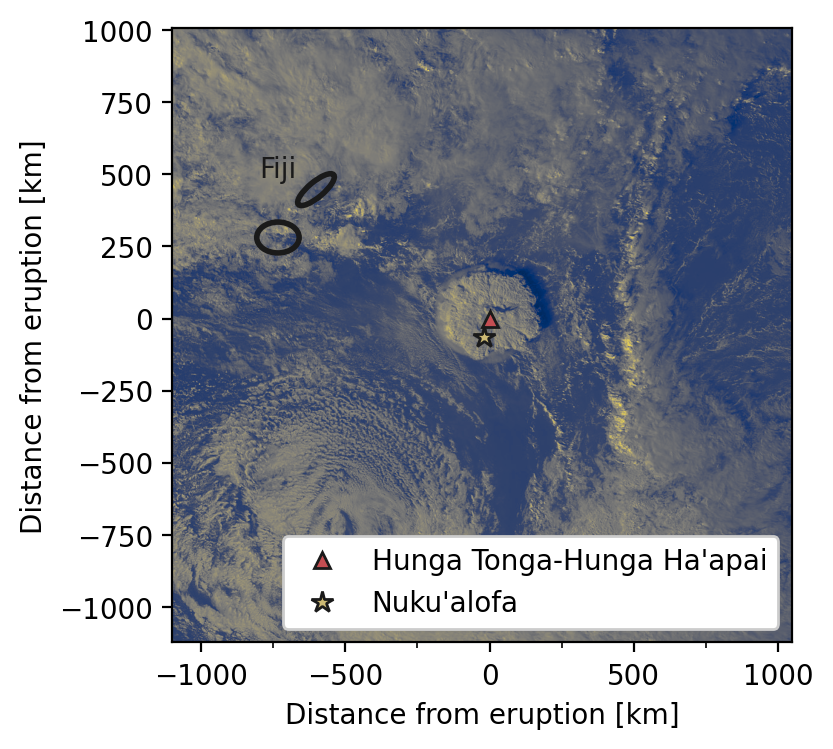

In [68]:
import requests
from PIL import Image as img
mpl.rcParams.update(mpl.rcParamsDefault)
from matplotlib.patches import Ellipse

url='https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Tonga_Volcano_Eruption_2022-01-15_0450Z.jpg/1024px-Tonga_Volcano_Eruption_2022-01-15_0450Z.jpg'
photo = np.asarray(img.open(requests.get(url, stream=True).raw))

fig,ax=plt.subplots(dpi=200, figsize=(4,4))
photplt = ax.imshow(photo,cmap=plt.colormaps['cividis'],
                    extent=[2.1*-524,2.1*500,2.1*-535,2.1*479])
ax.plot(0,0,'r^',ls='none',mec='k',label="Hunga Tonga-Hunga Ha'apai")
ax.plot(-20,-65,'y*',ls='none',mec='k',ms=8, label="Nuku'alofa")
ax.set_xlabel('Distance from eruption [km]')
ax.set_ylabel('Distance from eruption [km]')

viti=Ellipse( (-734,281), 147,107, fill=False, transform=ax.transData,
             ec='k', lw=2)
vanua=Ellipse( (-602,447), 160,53, angle=40, fill=False, 
              transform=ax.transData, ec='k', lw=2)
ax.add_artist(viti)
ax.add_artist(vanua)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(250))
ax.annotate('Fiji',(-800,490),color='k',xycoords=ax.transData)
ax.legend(loc=4,framealpha=1)
plt.show()

### Notes:
## Got scales from https://www.reuters.com/graphics/TONGA-VOLCANO/lgpdwjyqbvo/,
#    wikipedia, measuring with a ruler, & lots of proportions
## Since the image is black and white, the colormap is pseudocolor.
## An RGB image would be loaded as an MxN array of 3-tuples, where
#    each component of the tuple is an integer from 0 to 255.
## If you had 3 2D arrays representing single-channel images, they
#    could becomined with np.dstack() into an array that imshow() will
#    render as RGB.
## Angle is degrees CCW from due East & refers to the orientation of the
#    first axis specified (should be the major axis, but that's on you)
## ax.transData puts coordinates in data units. Note that x goes before y
#    in the tuple
## ax.transAxes lets you work in decimal fractions of the figure
#    width/height
## Also, ax.transData isn't enough if data coordinates are a map projection
# -->Must set projection at, e.g., ax.subplot(projection='mercator')

**Notes on Images, Heat Maps.** For image arrays and heat maps, there are 3 options: `imshow()`, `pcolor()`, and `pcolormesh()`. The table below gives a feature comparison to help you know which to use.

| | `imshow()` | `pcolor()` | `pcolormesh()` |
| --- | --- | --- | --- |
| Pixel shape | Square | Any quadrangle | Any quadrangle |
| Accepts RGB(A) Input | True | False | True
| Mask support | Values only | All axes | Values only |
| Relative Speed | Fastest | Slowest | Medium |
| Supports map projections | True | False | False |
| No. of interpolation (`shading`) options | 19 | 3 | 4 |

- For photos, `imshow()` is used almost exclusively because it preserves equal pixel aspect ratios and it natively supports map projections.
- For heatmaps, either `pcolormesh()` or `imshow()` (with or without the annotated heatmap code provided) will work, but since pcolormesh allows non-square "pixels", substituting `pcolormesh()` in place of `imshow()` in `imshow_heatmap.py` may let you save some space by compressing the vertical axis.

For irregular grids, `tricontour()` and `tricontourf()` are the only options that do not require interpolation to a regular grid, but you may have to interpolate anyway if the appropriate axes would have non-linear scales.

**Regarding color in quiver, stream, and wind barb maps.** `streamplot()`, `quiver()`, and `barbs()` take an optional positional argument for color and a `cmap` kwarg if the color arg is the same shape as the 3rd and 4th args. This works for `streamplot()` because the markers are long, but `quiver()` and `barbs()` can become hard to see for most "good" color maps. Most  Possible alternatives: 
- Black or white arrows/barbs on an `imshow()` or `contourf()` plot of the magnitudes of the vectors or a related parameter. Refer to [Lightness of Matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html#lightness-of-matplotlib-colormaps) to find color maps that contrast well with your choice of arrow color. Most colormaps with a low luminosity range trend light (e.g. 'summer', 'coolwarm', etc.), so black arrows tend to work better.
    - <span style="color:silver">Both `imshow()` and `contourf()` also have an `alpha` kwarg to decrease opacity, but with contourf(), any alpha value $<$1 will leave dark outlines between levels.</span>
- If you want to color the arrows, you might choose a dark background (not recommended for posters or journals that charge for color prints).
- As I mentioned earlier, `quiver()` has a 3D option, but it currently borders on unusable. I'd advise sticking with 2D projections or cuts.

I'll also point out that while it would be nice to be able to put the quiverkey on the plot instead of off the edge, there is no option to set the background color for the entire key, only the text.

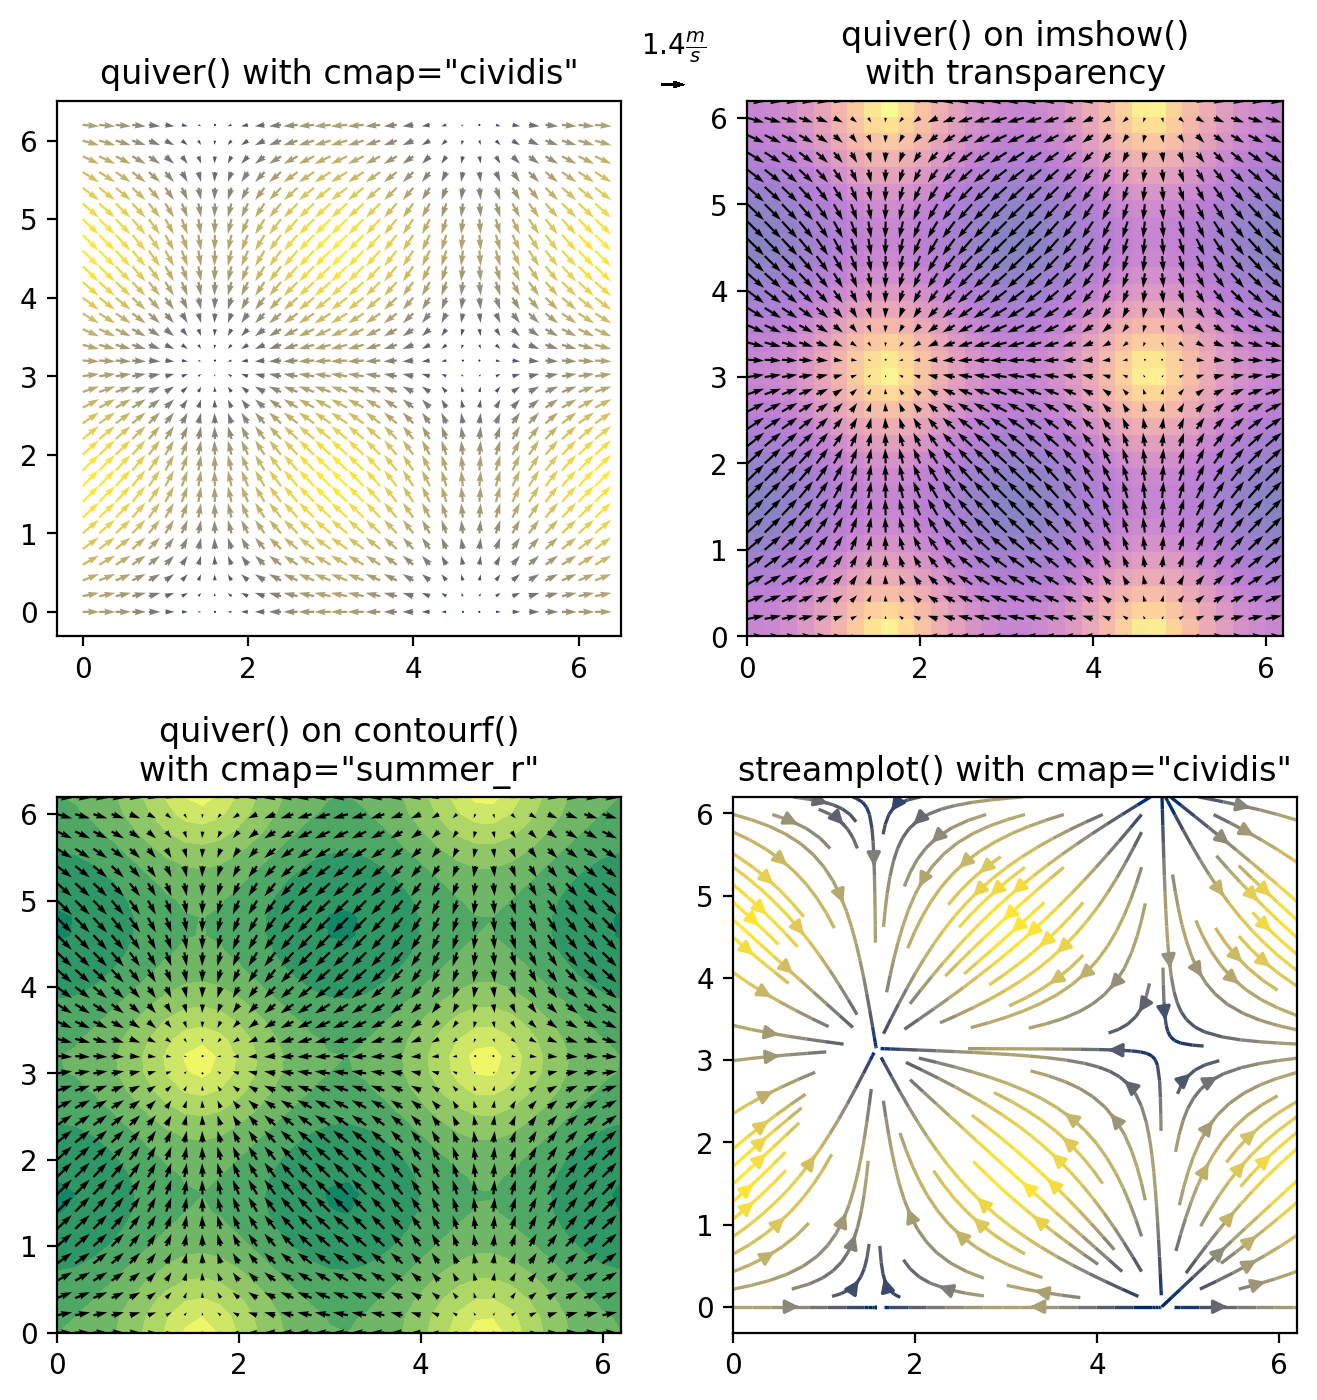

In [306]:
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

fig, axs = plt.subplots(ncols=2, nrows=2,dpi=200,figsize=(8,8))
fig.subplots_adjust(hspace=0.3)
M = np.hypot(U, V)
# Scale is inverse. Width is fraction of plot size; start around ~0.005
Q = axs[0,0].quiver(X, Y, U, V, M, scale_units='xy', scale=5, width=0.004,
              cmap=plt.colormaps['cividis'])
qk = axs[0,0].quiverkey(Q, 0.51, 0.89, np.max(M),
                        r'${:.1f} \frac{{m}}{{s}}$'.format(np.max(M)),
                        labelpos='N',coordinates='figure')
#labelpos can be N, E, S, or W
axs[0,0].set_title('quiver() with cmap="cividis"')

C2 = axs[0,1].imshow(M,cmap='plasma_r',alpha=0.5,
                extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)])
Q2 = axs[0,1].quiver(X, Y, U, V, scale_units='inches',scale=12,width=0.004)
axs[0,1].set_title('quiver() on imshow()\nwith transparency')

C3 = axs[1,0].contourf(X, Y, M, levels=8, cmap='summer_r', zorder=0)
Q3 = axs[1,0].quiver(X, Y, U, V, scale_units='xy', scale=6, width=.004)
axs[1,0].set_title('quiver() on contourf()\nwith cmap="summer_r"')

SP = axs[1,1].streamplot(X, Y, U, V, color=M, linewidth=1.2,cmap='cividis')
axs[1,1].set_title('streamplot() with cmap="cividis"')
plt.show()

#### **Spatially 3D Data$^\star$**
For print or other static 2D media, surfaces and volumes may be amenable to rendering in 3D without the need to show multiple angles for clarity. However, pointlike or linear data are usually better to render as a series of 2D cuts or projections. Matplotlib will try to render the depth dimension by, e.g. making background data more translucent and/or layering data appropriately, but these tricks often malfunction, as shown in the demo below. This is what happened when I tried to do the solar neighborhood demo with the Sun at (0,0,0). You can see the lengths I went to to get the data to overlap the z=0 plane the right way, to no avail:

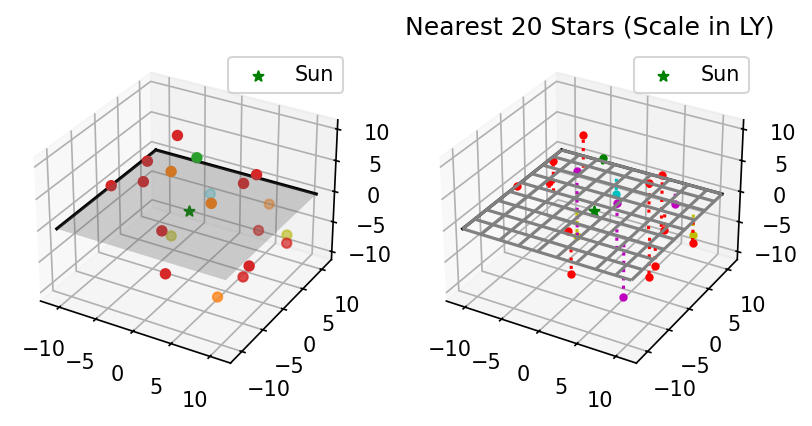

In [749]:
x,y,z,c = np.genfromtxt('solar_neighborhood.txt', encoding='ascii', 
                     dtype=[('x','<f8'),('y','<f8'),('z','<f8'), ('c','<U12')],
                     converters={3:lambda s: 'tab:'+str(s)}, unpack=True)

fig, axes = plt.subplots(ncols=2, subplot_kw = {"projection": "3d"}, dpi=150)
X, Y = np.meshgrid(np.arange(-11,11.5,0.5),np.arange(-11,11.5,0.5))
for ax in axes:
    ax.scatter(0,0,0, s=25, marker='*', color='g', label='Sun', zorder=4)
    ax.plot([-11,11],[11,11], [0,0], 'k-', zorder=0)
    ax.plot([-11,-11],[-11,11], [0,0], 'k-', zorder=0)
    ax.legend()
plt.title('Nearest 20 Stars (Scale in LY)')

axes[0].scatter(x[np.where(z<0)],y[np.where(z<0)],z[np.where(z<0)],
                c=list(c[np.where(z<0)]), zorder=1)
axes[0].plot_surface(X,Y,np.zeros(X.shape), color='gray', alpha=0.3, zorder=2)
axes[0].scatter(x[np.where(z>=0)],y[np.where(z>=0)],z[np.where(z>=0)],
                c=list(c[np.where(z>=0)]), zorder=3, alpha=1)

for i in range(len(x)):
    if 'orange' in c[i]:
        c[i]='m'
    elif 'olive' in c[i]:
        c[i]='y'
    else:
        c[i]=c[i][4]
        
idxn = np.where(z<0)
idxp = np.where(z>=0)
xn,yn,zn,cn = x[idxn], y[idxn], z[idxn], c[idxn]
xp,yp,zp,cp = x[idxp], y[idxp], z[idxp], c[idxp]

for i in range(len(xn)):
    axes[1].stem([xn[i]], [yn[i]], [zn[i]], linefmt=str(cn[i]+':'),
                 markerfmt=str(cn[i]+'.'),bottom=0.0, basefmt=" ")
axes[1].plot_wireframe(X,Y,np.zeros(X.shape), color='gray', rstride=5,
                       cstride=5)
for i in range(len(xp)):
    axes[1].stem([xp[i]],[yp[i]],[zp[i]], linefmt=str(cp[i]+':'),
                 markerfmt=str(cp[i]+'.'), bottom=0.0, basefmt=" ")  

Ultimately, the only solution without changing to 2D projections was to move the z=0 plane to the bottom of the grid cube as shown in the demo up in the review section. Even when the layering does work properly, the results can be hard to read. This is most obvious with scattered data, but as the 3D quiver demo showed, regular spacing of points and lines doesn't do much to alleviate the problems of overlapping and crowding. Compare the figure above or the demo in the review section with the following:

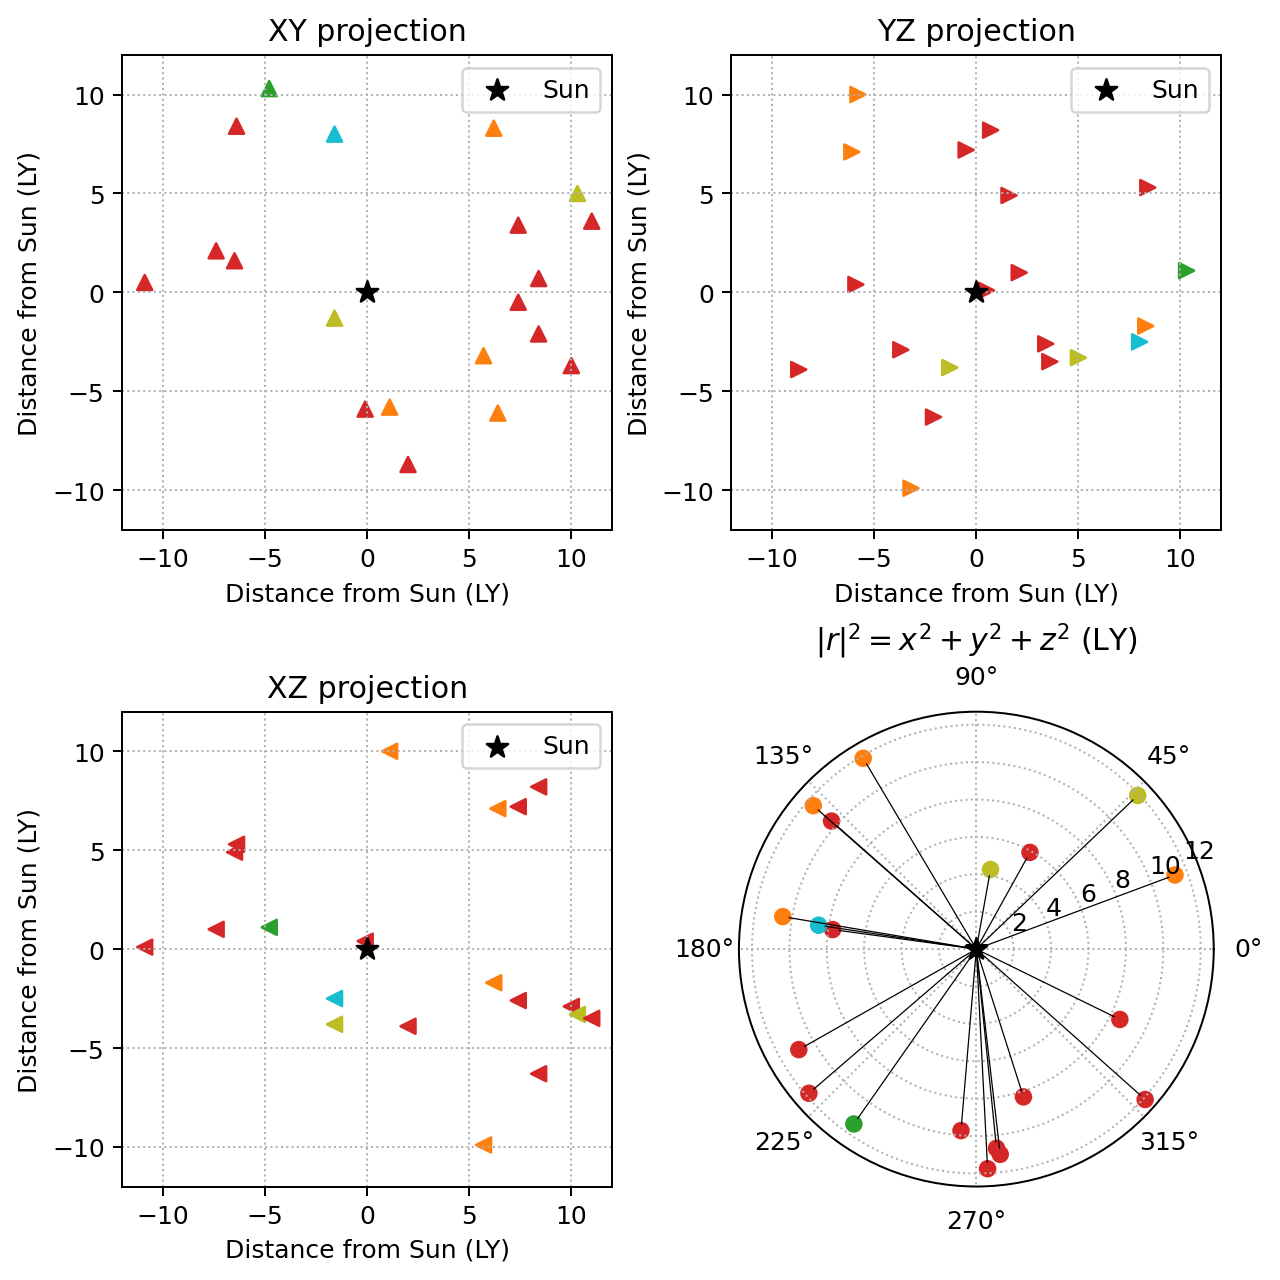

In [830]:
x,y,z,c = np.genfromtxt('solar_neighborhood.txt', encoding='ascii', 
                     dtype=[('x','<f8'),('y','<f8'),('z','<f8'), ('c','<U12')],
                     converters={3:lambda s: 'tab:'+str(s)}, unpack=True)
#reload data to make sure changes from previous tries don't carry over
fig, axes = plt.subplot_mosaic(
    """
    AB
    CD
    """, layout="constrained",figsize=(7,7),dpi=180,
    per_subplot_kw={"D": {"projection": "polar"}}
)
[ax.grid(zorder=0, ls=':') for ax in axes.values()]
axes['A'].scatter(x,y,c=list(c),marker='^')
axes['A'].set_title('XY projection')
axes['B'].scatter(y,z,c=list(c),marker='>')
axes['B'].set_title('YZ projection')
axes['C'].scatter(x,z,c=list(c),marker='<')
axes['C'].set_title('XZ projection')
theta = np.arctan(y/x)
r3d = np.sqrt(x**2+y**2+z**2)
axes['D'].scatter(theta*180/np.pi,r3d,c=list(c))
axes['D'].set_title('$|r|^2=x^2+y^2+z^2$ (LY)')
for i in range(len(theta)):
    axes['D'].plot([0,theta[i]*180/np.pi],[0,r3d[i]-.35],'k-',lw=0.5)

for k, ax in axes.items():
    ax.scatter(0,0,s=80, marker='*', color='k', label='Sun',zorder=99) 
    if k!='D':
        ax.legend()
        ax.set_xlabel("Distance from Sun (LY)")
        ax.set_xlim([-12,12])
        ax.set_ylim([-12,12])
        ax.set_ylabel("Distance from Sun (LY)")

If your publication requires a projected picture of a 3D dataset, I have not found a better method of finding the optimal viewing angle than trial and error in a GUI. For that, you should use a scripter like Spyder, PyCharm, or VSCode. Graphics produced in Jupyter notebooks are static, so the viewing angle is hard to adjust and changing it requires regenerating the figure every time. Nonetheless, if you must disseminate your data as part of a Jupyter notebook, the command to set the viewing angle is `ax.view_init(elev=None, azim=None, roll=None, vertical_axis='z')` where the 3 angular parameters are in degrees. You can also zoom in or out and set the aspect ratio of the figure with the `ax.set_box_aspect((4, 4, 3), zoom=1)`. The default aspect ratio of a 3D figure is `x:y:z=4:4:3`, but in `ax.set_box_aspect()`, the 3-tuple specification of the aspect ratio is a required argument. Here I modify the official documentation's example of a mobius strip with the triangular mesh to demonstrate these features:

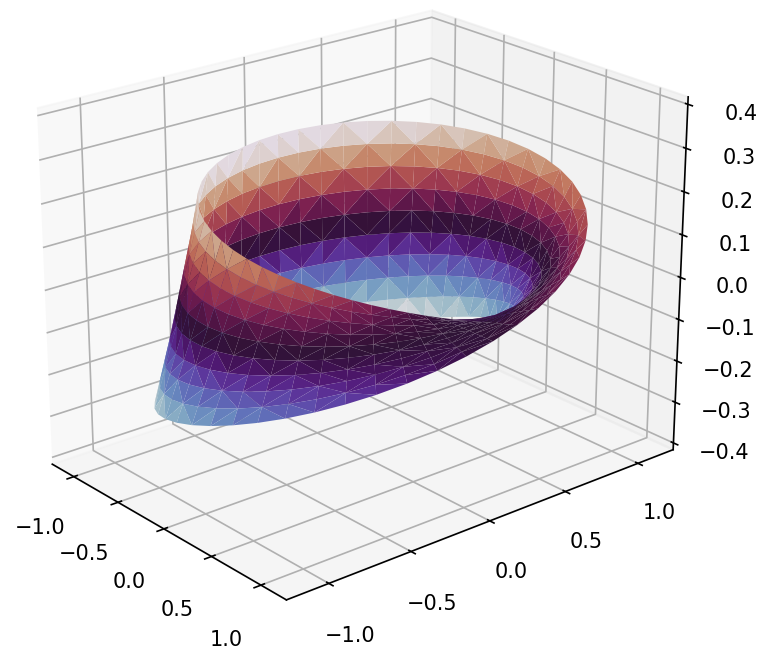

In [973]:
import matplotlib.tri as mtri

fig, ax = plt.subplots(dpi=150,subplot_kw = {"projection": "3d"})

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.twilight)#, antialiased=False)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_zlim(-0.4, 0.4)
ax.view_init(elev=22, azim=-40, roll=0, vertical_axis='z')
ax.set_box_aspect((3, 4, 3), zoom=1.3)

### <span style="color:lightseagreen">Quantity</span> and <span style="color:crimson">Density</span>

For most of this segment, I'll assume we're talking about tabular or functional data with no more than a handful of numerical parameters.
- Functional/model data (continuous) $\to$ usually lines or surfaces
- Measured or derived observational data (discrete) $\to$ usually scattered points, count plots, or density plots

The most appropriate approach to rendering observational data on a scatter or density plot will depend on the number of data points or lines, how they are distributed across the parameter space, what models or previous results you need to show on the same plot, and *what features you want to emphasize.*

#### **1. Scattered data by the numbers**
A) If you have **tens to a few hundred data points**, coloring your data by a third parameter can be a good way to show an extra qualitative dimension (e.g. distinct models) on a 2D plot. Matplotlib’s `scatter()` command has kwargs denoted `c` and `cmap`. `c` takes arrays of the same dimensions as `x` and `y`, and `cmap` lets you specify a color palette if `c` is numerical data.
- This approach can work with a numerical 3rd parameter, but only if it is strongly correlated with one or both of the axes parameters.
- If color is used to indicate different data sources or categories, and you have $\lesssim200$ data points, vary the markers as well so the categories will still be distinct to those with colorblindness, or if you expect the article to be printed in greyscale.
- Try to avoid marker styles that repeat a previously used shape in a different orientation (problematic for dyslexic), or use of octagons with large circles (indistinct at typical sizes).

B) If you have **a few $\times 10^2-10^3$ data points**, consider giving your data some transparency (setting the `alpha` kwarg to between 0 and 1, typically 0.2-0.5) so that dense concentrations of data stand out but outliers remain visible.

C) If you have more than a few $\times 10^3$ data points, 2D histograms, KDE plots, and (to a much lesser extent) contour plots are your friends.
- If outlying data points can be significant, `corner.hist2d()` (https://corner.readthedocs.io/en/latest/api.html) can switch from showing a contoured 2D histogram to showing individual points below an internally-calculated or user-defined density threshold.
- If a 2D-histogram with logarithmic binning is appropriate, then outliers will still be visible at roughly the right coordinates (not so with regular binning).
- Many rules for binning histograms, but all agree that the data should be dispersed over roughly $\sqrt[3]{n}-\sqrt{n}$ bins where $n$ is the number of data points (empty bins necessitated by the grid need not count against that number).
- If you want to contour the density distribution of scattered 1D or 2D data, often what you really want to compute is a kernel density estimation (KDE), not a binned histogram.

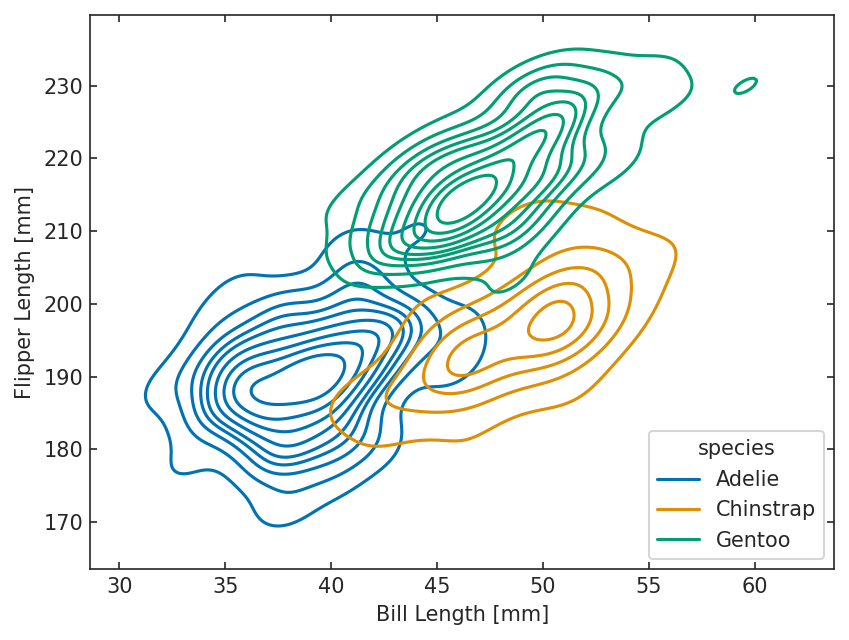

In [9]:
#let's go back to the penguins data set & plot bill length vs flipper
# length for each species as a series of overlapping contours.
#Here's the easy way, with Seaborn:
plt.figure(dpi=150)
sb.set_style('ticks')
sb.set_palette('colorblind')
kde = sb.kdeplot(penguins, x='bill_length_mm',
                 y='flipper_length_mm', hue='species')
sb.move_legend(kde,'lower right')
plt.xlabel('Bill Length [mm]')
plt.ylabel('Flipper Length [mm]')
plt.tick_params(direction='in',right=True, top=True)
plt.show()

344 32.1 59.6 172.0 231.0


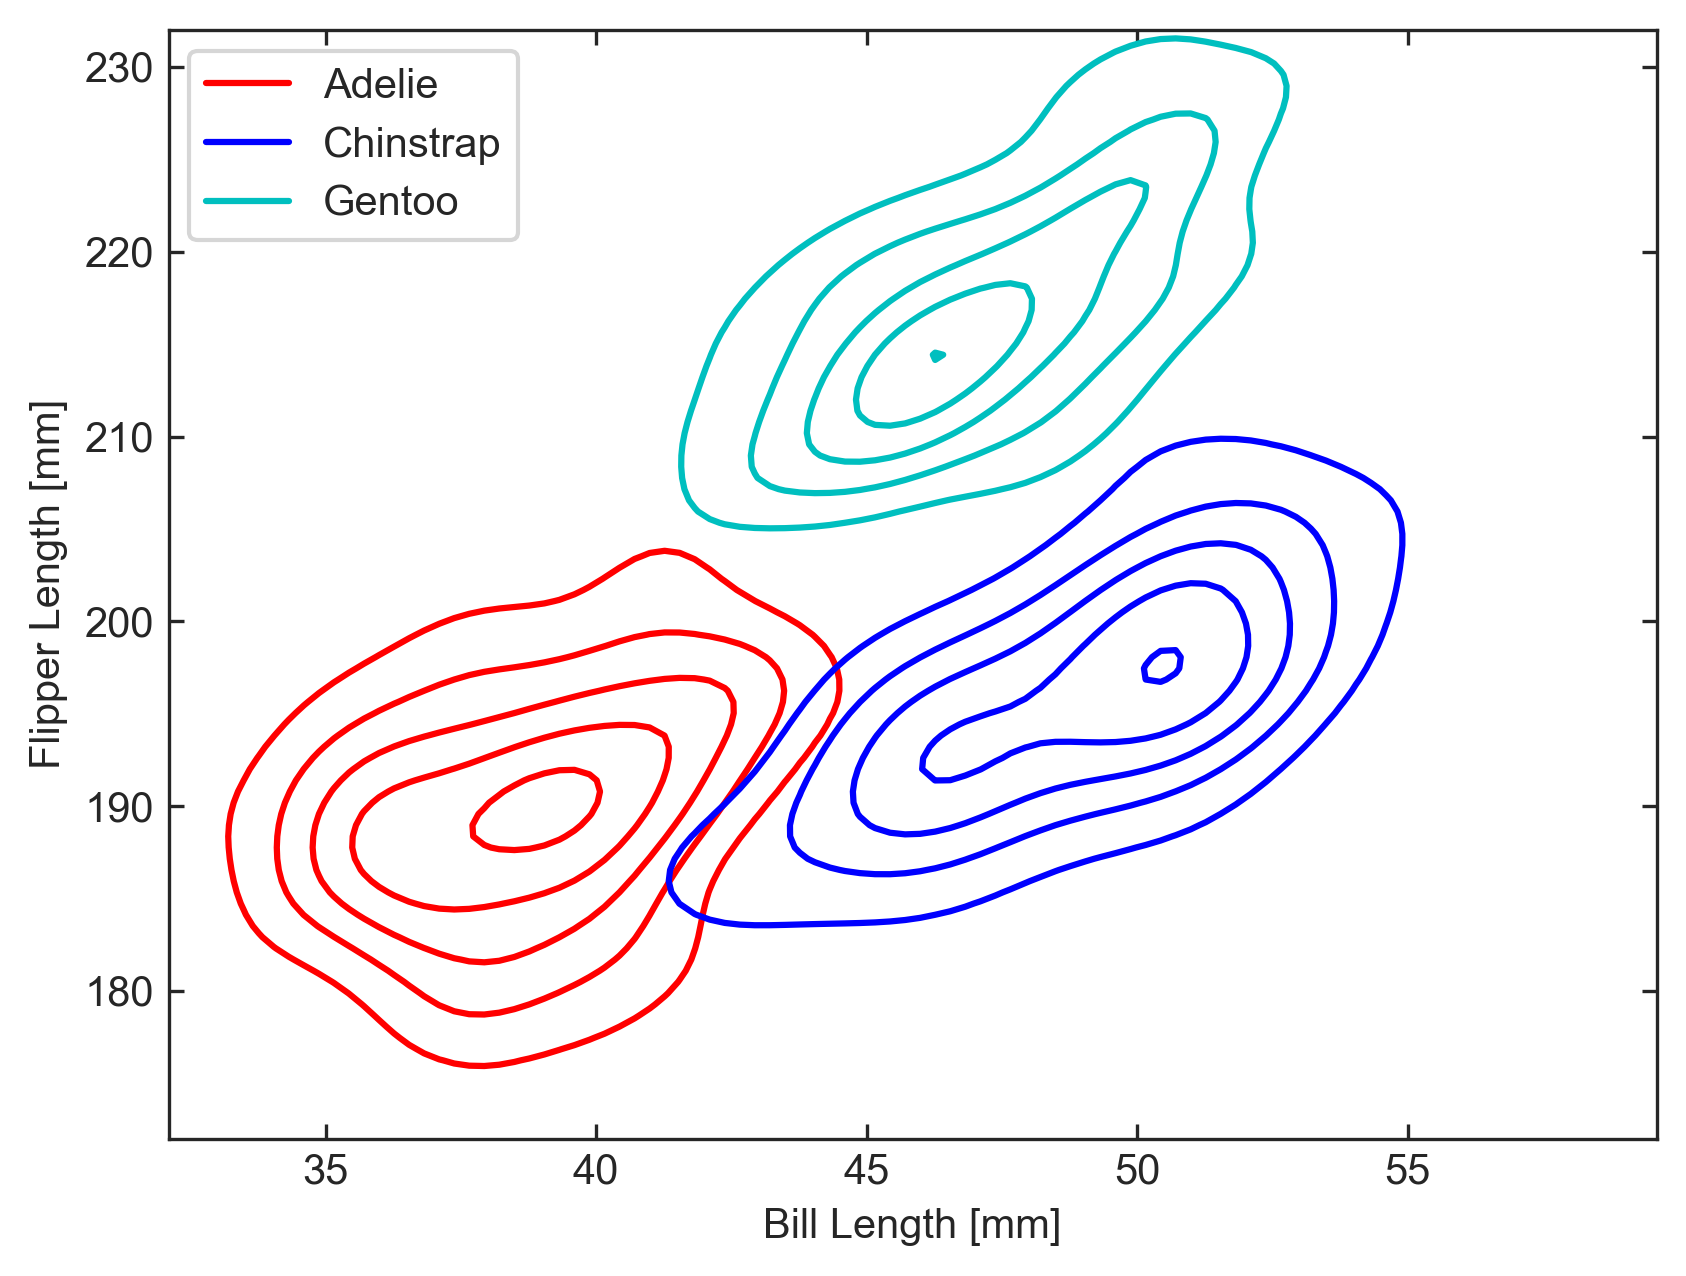

In [5]:
#Now here's what you have to go thru to do the same thing
# with just Numpy & Matplotlib
#But first we have to convert the dataFrame to arrays, which you would not
# have to do.

lenbill, lenflip = penguins[['bill_length_mm',
                             'flipper_length_mm']].to_numpy().T
species = penguins['species'].to_numpy()

from scipy.stats import gaussian_kde

X, Y = np.mgrid[min(lenbill):max(lenbill):100j,
                min(lenflip):max(lenflip)+1:100j]
pos = np.vstack([X.ravel(), Y.ravel()])

lines = []
fig, ax = plt.subplots(dpi=300)
labels = sorted(list(set(species)))
cc = ['r','b','c']
for j,s in enumerate(labels):
    inds = np.where(np.logical_and(species == s, np.isfinite(lenbill)))
    kernel = gaussian_kde(np.array([lenbill[inds],lenflip[inds]]))
    Z = np.reshape(kernel(pos).T, X.shape)    
    pcp = ax.contour(X,Y,Z, colors=cc[j], levels=5)
    lines.append( mpl.lines.Line2D([], [], color=cc[j], label=s) )
ax.legend(handles=lines, loc=2)
ax.set_xlabel('Bill Length [mm]')
ax.set_ylabel('Flipper Length [mm]')
ax.tick_params(direction='in',right=True, top=True)
plt.show()

Contours require a bit of special attention.
- Pairwise scattered data cannot be input directly into any of Matplotlib's native contouring functions (`[tri]contour[f]()`); you must first create a 2D histogram or KDE, and contour that.
    *  <span style="color:dimgray">If you think you will need to plot contours of the density distributions of scattered data often, I ***strongly*** recommend you learn how to use Pandas DataFrames and Seaborn's `kdeplot()`.</span>
- Filled contours (`[tri]contourf()`) are more intuitive and less confusing if you need to plot linear or scattered data on top.
- Line contours are better to overlay on images, other sets of contours, or other continuous 2D distributions.
- Legends are not natively supported for contours: if you put more than one set of contours on the same plot, [you will need to make a proxy artist a la these Matplotlib demos.](https://matplotlib.org/stable/users/explain/axes/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists)

Overcrowding is the biggest risk you face with scatter plots or plots featuring multiple models. If you are adding data to a figure in circulation that many other research groups have contributed to, **it is OK to deemphasize other data and highlight your own.** Consider:
- Decreasing the opacity (`alpha`) of other data.
- Making the marker size of your data larger, or others' data smaller.
- Showing error bars only for your own data.
- Coloring your data black and making all other data lighter colors, e.g. with a custom color cycler.
- Using a bright color for your data while using muted or neutral colors for all other data (note that this approach is not suitable for greyscale printing).
- Making line(s) you want readers to focus on thicker and more solid, or diminishing less important lines by making them dotted. Solid lines (`linestyle = '-'`) are more prominent than dashed (`linestyle = '--'`) and dot-dashed (`linestyle = '-.'`) lines, which are more prominent than dotted (`linestyle = ':'`) lines.
- Keep your data on top by setting the `zorder` kwarg to a large number, at least as large as the total number of separate data sets you must add, plus any grids or text. (Note: if you call `ax.grid()`, set `zorder=0` to keep the grid on the bottom.)


Here's an example of how I put most of those tips into practice in one of my papers: ![fig 3 from Pitts et al 2021](https://www.aanda.org/articles/aa/full_html/2022/01/aa42324-21/aa42324-21-fig6.jpg) (If I'd turned the axis ticks inward, I might've done them all the way around, but on a tight grid like this, outward pointing ticks could get confusing in the middle)

For this plot, I set the colors and markers in the data table itself, but to set a similar color and marker style in Python, you might code it up in a block like the following.

In [ ]:
from itertools import cycle
c_cycle = cycle(['tab:orange','tab:blue','tab:red',
                 'tab:green','tab:cyan','m',# m = magenta
                 'navy','maroon','purple'])
m_cycle = cycle(['.', 'd', '+',
                 's', 'v', '^',
                 'D', '*', 'x']) 
#pretend we have a dict of studies & data by author group
for authors,study in studies.items():
    plt.scatter(study[:,0],study[:,1], c = next(c_cycle),
                ms = next(m_cycle), ls='', label=authors)

#### **2. Lines**
If you know all the color and linestyle options there are for lines, it's easy to think you could technically cram several tens of lines into one plot. In practice, the upper limit depends heavily on what else is on the figure, and many of the color or line options are not really usable together.
- Lines with error margins and/or underlying scattered data: **up to 4-5 curves** depending on whether underlying data have color
- Lines without error margins and no underlying scattered data: 
  * <span style="color:silver">**8-10 independent curves** of similar importance</span>
  * <span style="color:silver">**10-20 curves on a hierarchy**</span>
  * <span style="color:silver">**many if data are correlated and evolving** with a third variable (e.g., annual mean temperature curves over time, or spectra of chemicals sublimating from ice over a temperature range)</span>
  

Since the different linestyles have varying levels of clarity, there is an unspoken hierarchy of linestyles that should be considered in the context of your message: 
1. Solid lines (`ls='-'`) - clearest $\to$ most important
2. Dashed lines (`ls='--'`)
3. Dot-dashed lines (`ls='-.'`)
4. Dotted lines (`ls=':'`) - easiest to lose among scattered data $\to$ least important

If you are plotting on top of scattered data, it's generally best to avoid the dotted style altogether.

#### **3. Uncertainty handling**
Scattered data by the numbers:
- With only a few tens of data points, *individual error bars or limits on each point are a must.* Error bars should also have caps to show that they are uncertainties and not just `+` or `|` markers.
- For several tens to ~100 data points, you may omit the caps to reduce clutter and/or show error bars on every nth point with the `errorevery` kwarg.
- For several hundred to a few thousand points, plotting a point in a corner with representative error bars can work well (or a few representative points if the data come from several sources, instruments, or methods).

Lines:
- First use `fill_between()` (or `fill_betweenx()`) with a light color or a low opacity (`alpha` kwarg), and then overplot the main model/data line(s). [The Matplotlib docs also have a template to produce a similar effect for parametric curves](https://matplotlib.org/stable/gallery/lines_bars_and_markers/curve_error_band.html). This approach is more intuitive than plotting the upper and lower uncertainty margins as separate lines.

Error bars can be tricky if you have a mix of firm margins and limits, especially if your error bars are asymmetric.
- The `lolims`, `uplims`, `xlolims`, and `xuplims` kwargs take boolean mask arrays.
- Where the limit masks are `True`, the `xerr` and/or `yerr` arrays must still have values to use as the lengths of the limit arrows  Recommended: use a length that contrasts with data that have firmer margins.
- If the error bars are asymmetric, wherever there is a limit, there must be a positive value in the direction that the limit arrow should point; the other value will be ignored unless it raises a value error (e.g. 0 on a log-log plot).

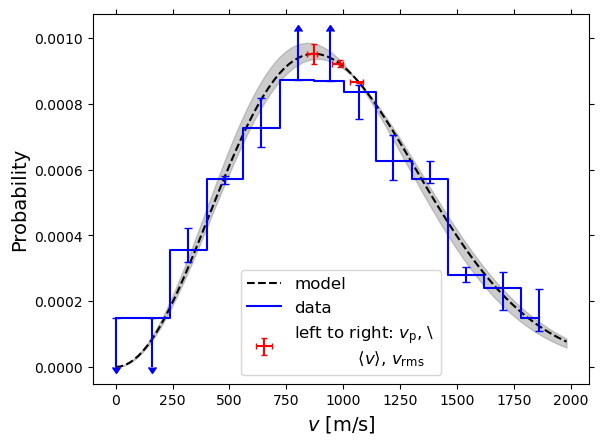

In [35]:
mpl.rcParams.update(mpl.rcParamsDefault)
#The velocity distribution of atoms in a xenon lamp is known at room 
# temp (off), but what about when you turn it on and it hits 5600-6200K?
# (let T = 6000^+200_-400 K)
k_B = 1.380649*10**-23
m_amu = 1.660539*10**-27 #atomic mass unit
def max_boltz_pdf(v,m_u,T):
    m2kT = m_u*m_amu / (2*k_B*T)
    return (((m2kT / np.pi)**1.5) * (4*np.pi*v**2)
            * np.exp(-(v**2) * m2kT))
mpvs = np.sqrt(2*k_B*np.array([5600.,6000.,6200.]) /
               (131.293*m_amu) ) # = 872 m/s at T=6000 K
mv = mpvs*2/np.sqrt(np.pi)
rmsv = mpvs*np.sqrt(1.5) #most probable, mean, & rms velocities

x = np.array([mpvs[1],mv[1],rmsv[1]])
vs = np.sort(np.concatenate((np.arange(0.,2000.,20.),x)))
mbd_6000 = max_boltz_pdf(vs,131.293,6000.)
mbd_5600 = max_boltz_pdf(vs,131.293,5600.)
mbd_6200 = max_boltz_pdf(vs,131.293,6200.)
y = max_boltz_pdf(x,131.293,6000.)
#Mock up some errors
xerrs = [x-np.array([mpvs[0],mv[0],rmsv[0]]),
         np.array([mpvs[2],mv[2],rmsv[2]])-x]
yerrs = np.zeros((2,3))
for i,xi in enumerate(x):
    vi = np.where(vs == xi)
    if mbd_6000[vi]-mbd_5600[vi] > 0:
        yerrs[0][i] = mbd_6000[vi]-mbd_5600[vi]
    else:
        yerrs[1][i] = abs(mbd_6000[vi]-mbd_5600[vi])
    if mbd_6200[vi]-mbd_6000[vi] > 0:
        yerrs[1][i] = mbd_6200[vi]-mbd_6000[vi]
    else:
        yerrs[0][i] = abs(mbd_6000[vi]-mbd_5600[vi])
# fudge some noise and limits
probs = mbd_6000[::8]+np.random.default_rng()\
    .uniform(-1,1,len(vs[::8]))*0.0001
probs[np.where(probs<0.00015)]=0.00015
perrs = np.array([np.random.default_rng()\
                  .uniform(0,1,len(vs[::8]))*0.0001,
                  np.random.default_rng()\
                  .uniform(0,1,len(vs[::8]))*0.0001])
plolims = np.zeros(probs.shape)
puplims = np.zeros(probs.shape)
puplims[0:2]=1
plolims[5:7]=1
perrs[1,5:7]=0.00015
perrs[0,0:2]=0.00015

fig, ax = plt. subplots(dpi=100)
ax.fill_between(vs, mbd_5600, mbd_6200, alpha=0.4, color='gray')
ax.plot(vs, mbd_6000, 'k--', label='model')
ax.errorbar(x, y, xerr=xerrs, yerr=yerrs, linestyle='', 
            ecolor='r', capsize=2, zorder=20,
            label = r'left to right: $v_{\mathrm{p}}$, \
            $\langle v \rangle$, $v_{\mathrm{rms}}$') 
ax.set_xlabel('$v$ [m/s]',fontsize=14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(top=True, right=True)
ax.step(vs[::8], probs,color='b', where='mid', label='data')
ax.errorbar(vs[::8], probs, yerr=perrs,
            uplims=puplims, lolims=plolims,
            linestyle='', ecolor='b', capsize=3)
#Note: capsize also controls arrow size
ax.legend(loc=8,fontsize=12)
plt.show()

## II. Global Constraints
**A journal's printable dimensions, especially the short axis, will determine the maximum figure size.** Check your journal's submission guidelines for the exact margins, but for most journals, a safe maximum figure size is about 15 cm $\times$ 21 cm or, since matplotlib works in inches, about 6" $\times$ 8".

|    | A4 | US Letter |
| --- | --- | --- |
| Width (cm) | 21 | 21.59 (8.5") |
| Height (cm) | 29.7 | 27.94 (11") |
| Margins (cm) | 2-3 | 2.54-3.18 (1-1.25") |
| **Printable width (cm)** | 15-17 | 15-17 (6-6.5") |
| **Printable height (cm)** | 23.7-25.7 | 21.6-22.9 (8.5-9") |

- The smallest readable *subfigure* will depend on data and design choices, but **a good rule of thumb is to avoid having subplots smaller than ~1 inch or ~3 cm on a side**.
- Color bars, axis labels, and captions also take up space $\to$ subplot grids denser than 4$\times$6 are unlikely to fit on the page. Might fit 1 more row and/or column if the panels are images that don't require axis labels.

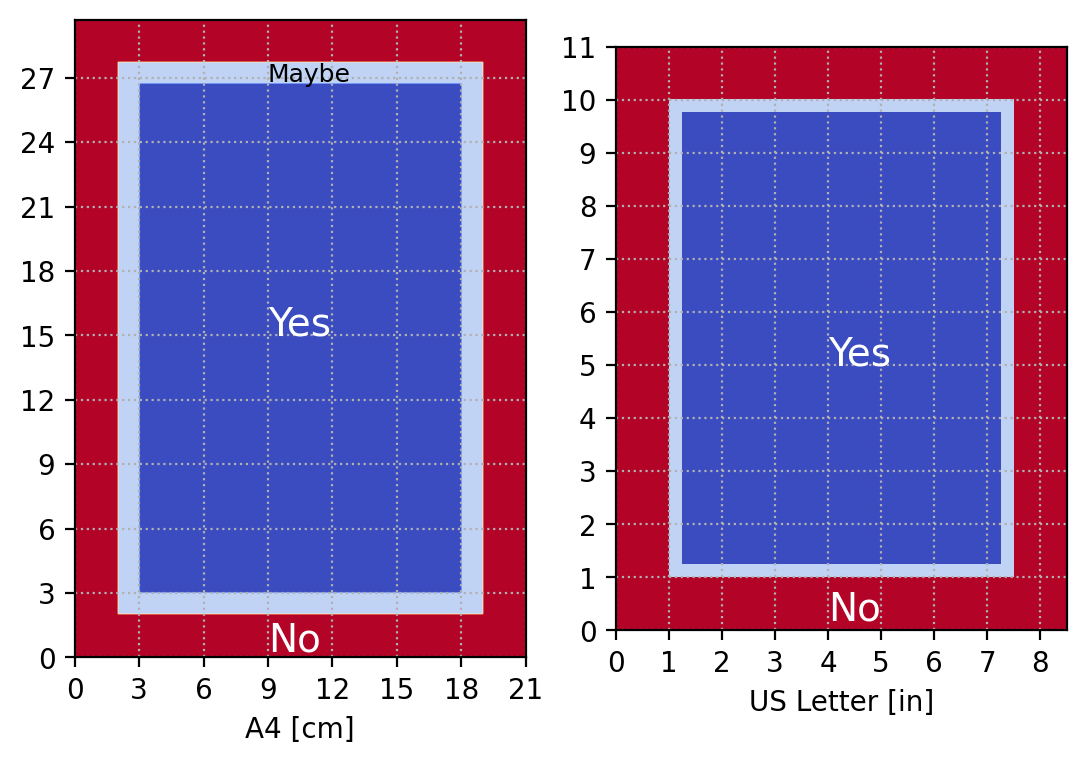

In [28]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
%matplotlib inline

A4 = np.ones((297,210))
ltr = np.ones((44,34))

A4[20:-20,20:-20]=0.4
ltr[4:-4,4:-4]=0.4

A4[30:-30,30:-30]=0.0
ltr[5:-5,5:-5]=0.0

# I always have to remind myself: arrays are assigned down and across,
#   but extent is [left, right, bottom, top]
fig,(ax1,ax2) = plt.subplots(ncols=2, dpi=200)
ax1.imshow(A4,cmap=plt.colormaps['coolwarm'],extent=[0,21,0,29.7],
           aspect='equal')
ax1.set_xlabel('A4 [cm]')
ax1.set_xticks(np.arange(0,22,3))
ax1.set_yticks(np.arange(0,30,3))
ax1.grid(visible=True, which='both',axis='both',linestyle=':')
ax1.text(9,15, 'Yes',color='w',fontsize=14)
ax1.text(9,26.8,'Maybe',color='k',fontsize=9)
ax1.text(9,0.3, 'No',color='w',fontsize=14)

ax2.imshow(ltr,cmap=plt.colormaps['coolwarm'],extent=[0,8.5,0,11],
           aspect='equal')
ax2.set_xlabel('US Letter [in]')
ax2.set_xticks(np.arange(0,9))
ax2.set_yticks(np.arange(0,12))
ax2.grid(visible=True, which='both',axis='both',linestyle=':')
ax2.text(4,5, 'Yes',color='w',fontsize=14)
ax2.text(4,0.2, 'No',color='w',fontsize=14)
plt.show()
#Note to self, might need tensorflow for image to numpy array imports
# --> see https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/

The editors will typically request high-resolution (300 dpi) figures separately from the compiled publication file. Preferred formats vary by journal. A few common formats that Matplotlib supports include PDF, PS, EPS, PNG, and JPG/JPEG
- **Recommended: PDF.** Every major OS comes with a PDF viewer, and PDF images scale well.
- PS and EPS are listed as some journals' top format choices, but these formats require special viewing software and may not support transparency.
- PNG is Matplotlib's default format. PNGs are usually accepted but discouraged due to their large size.
- JPG/JPEG images are economical in computing resources, but images saved in this format degrade when edited or resized.

Other desirable formats like TIFF and SVG are not supported natively but can be used with the installation of the `Pillow` module. [Matplotlib has a tutorial here on importing images into arrays for use wth `pyplot.imshow()`.](https://matplotlib.org/stable/tutorials/images.html) More on this module in the 2nd session.

Matplotlib uses a default resolution of 100 dpi and a default figure size of 6.4" x 4.8" (16.26 x 12.19 cm). The inline backend in Jupyter uses an even lower-res default of 80 dpi.
- You may want to set `dpi=300` in `plt.figure()` or `plt.subplots()` (not a a valid kwarg in `plt.subplot()` singular) at runtime, in `plt.savefig()` or `plt.imsave()`, or if you want to apply it for all figures in your current session, set `mpl.rcParams['figure.dpi'] = 300`.
- The `figsize = (i,j)` kwarg in `figure`, `subplots`, `savefig` and `imsave` also lets you adjust the figure size and aspect ratio, though you'll have to do some conversions if you want to work in metric units or pixels.

### Font
Most journals also regulate the minimum size of font for axis labels and annotations, either explicitly or via revision requests from the editorial department. 
* That floor is usually 9-10 pt (3-3.5 mm, or 0.75-0.8 REM).
* However, **11-14 pt fonts are preferred,** and you should favor larger text when possible for accessibility.

No consensus on whether serif (e.g. Times New Roman, Georgia, Palatino) or sans serif (e.g. Arial, Helvetica, Verdana) fonts are better for readability (you will find researchers on both sides claiming the matter is settled in their favor). Familiarity is more important.
* My advice: Matplotlib's default font (usually DejaVu Sans) is similar enough to the most popular fonts to be a safe choice.
* **Be consistent** - if you're using software other than Matplotlib for some of your figures, make sure the font is the same. The following commands will help:

In [45]:
import matplotlib as mpl
### To select a sans-serif font:
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
### To select a serif font:
#mpl.rc('font',**{'family':'serif','serif':['Liberation Serif']})
mpl.rc('text', usetex=False)
### Don't enable TeX unless 1) You're using serif fonts &
###  2) Matplotlib's built-in TeX handling already told you
###  that it didn't recognize the symbol you tried to insert

### To reset to defaults:   
mpl.rcParams.update(mpl.rcParamsDefault)

#### **Matplotlib and LaTeX**
Most journals expect that you typeset all variables and math scripts so they appear the same in your plots main text. [Matplotlib now supports most LaTeX math commands,](https://matplotlib.org/stable/users/explain/text/mathtext.html#mathtext) but you need to know some basic LaTeX syntax:
- LaTeX typesetting happens only within strings, and commands or command sequences must be bracketed with dollar signs (`'$ $'`)
- Most functions that modify characters' sizes, positions, and/or surrounding markings only take arguments in curly braces (`{}`) and will raise an error if the braces are missing. 
    - <span style="color:silver">A few, like superscript (`'^'`) and subscript (`'_'`) will work, but only on the first character after the operator if the braces are omitted.</span>
    - <span style="color:silver">Commands that take >1 arg may use extra pairs of curly braces (e.g., `'$\frac{}{}'`) or a pair of square brackets (e.g., `'$\sqrt[n]{}$'` where *n* is an optional argument for rendering an nth root) - see documentation.</span>
- In most STEM journals, variables are conventionally *italicized*, but descriptive subscripts and superscripts are not. To remove italics from super-/subscripts, enclose the text in `'\mathrm{}'` and wrap the whole expression in the curly braces after the superscript or subscript operator.
- LaTeX may need to be installed separately for Matplotlib versions earlier than 3.7, or for exceptionally obscure symbols or odd-sized delimiters.

Unfortunately, Matplotlib needs some cajoling to work with LaTeX.
- In `str.format()`, **all** curly braces (`{}`) associated with LaTeX commands must be doubled (`{{}}`), including nested braces. An odd-numbered set of nested curly brace pairs will be interpreted as a site for string insertion.
- Many characters also require the whole string to have an r (for raw input) in front of the first single- or double-quote, like $\times$ (rendered as `'$\times$'`), $\pm$ or $\mp$(rendered as `'$\pm$'` and `'$\mp$'` respectively), or most Greek letters.
- Most basic operator symbols (+, -, /, >, <, !, :, |, \[\], ()) can be used as-is, but some that have functional meanings in LaTeX, Python, or both (e.g. \$ and \%) must be preceded by a single- (LaTeX command symbols only) or double-backslash (\\\\) to escape their typical usage.
- Spaces within any character sequence between two `$`s are not rendered; they only exist to separate alphabetic characters from commands. You can insert a space with `\;` if you don't want to split up the LaTeX sequence to add spaces.

**Example:** Let's say you've measured some initial velocity, denoted `v_init` in your code, with a magnitude of 15.1 m/s, and it has an asymmetric uncertainty of `error_arr=[-0.4,0.3]`. If you then wanted to annotate a relevant figure with $|\vec{v}_{\mathrm{init}}|\;=\;15.1^{+0.3}_{-0.4}\;\mathrm{m\cdot s}^{-1}$, the format string would look like this (all on one line):
    `r"$|\vec{{v}}_{{\mathrm{{init}}}}|\;=\;-{:.1f}_{{{:.1}}}^{{+{:.1}}}\;\mathrm{{m\cdot s}}^{{-1}}$".format(v_init,*error_arr)`

Note that you *can* use string insertion inside of formatting operators like the super- and subscript commands.

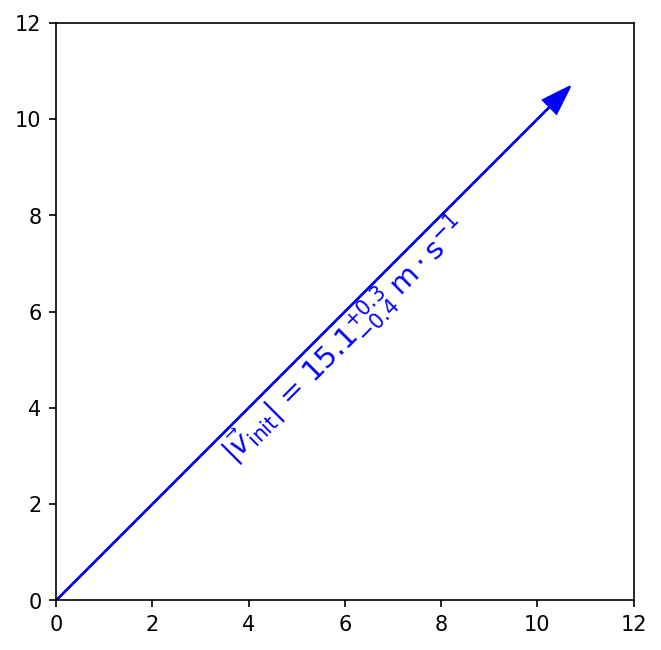

In [3]:
v_init=15.1
error_arr=[-0.4,0.3]
fig,ax=plt.subplots(dpi=150,figsize=(5,5))
ax.set_aspect('equal') #arrowheads will slant if axes are not equal
ax.arrow(0,0,10.68,10.68,length_includes_head=True,color='b',
         head_width=0.4)
ax.text(6, 5.4, r"$|\vec{{v}}_{{\mathrm{{init}}}}|$ = ${:.1f}_{{{:.1}}}^{{+{:.1}}}\;\mathrm{{m\cdot s}}^{{-1}}$".format(v_init,*error_arr),
        ha='center',va='center',rotation=45.,size=14, color='b')

ax.set_xlim(0,12)
ax.set_ylim(0,12)
plt.show()

### Axis Ticks, Labels, and Grids
#### **1. Axis Ticks**
Matplotlib's current default is outward-pointing ticks on the left and bottom, but ticks on all sides are preferable for readability.

- *Inward-pointing ticks on all sides:* older standard, still looks best for data that rarely approaches the axes and figures with many subplots. Since default tick direction is outward, code is:

    `ax.xaxis.set_tick_params(direction='in', which='both')`
    `ax.yaxis.set_tick_params(direction='in', which='both')`    
    `ax.tick_params(axis='both', which='both', top=True, right=True)`
- *Outward-pointing ticks on all sides:* rising preference, best for images and plots where data can obscure interior axes ticks. To build on Matplotlib's default, code is:

    `ax.tick_params(axis='both', which='both', top=True, right=True)`
- *Regardless:* be consistent throughout your paper!
- If one of your axes is a variable that is very often expressed with a different metric (e.g. spectra are plotted w.r.t. wavelength and frequency almost equally often), expect a referee to request that on a second axis.

#### **2. Tick Labels and Locators**
You may need to modify the auto-generated tick labels and locators, or set them entirely by hand, if you want to have:
- Units with special formats or symbols (e.g. dates and/or times, currencies, coordinates, etc.)
- Irrational units (e.g. multiples of $e$, fractions of $\pi$, etc.)
- Qualitative variables (e.g. countries, species, relative size categories, etc.)
- Axis tick labels centered between major ticks
- Secondary axes that are transformations of the primary axes
- Custom or power-law axis scales
- Log-, symlog-, or asinh scaling with labels on every decade and visible minor ticks over >7 decades

on one of more of your axes, or if you want any of the above on a colorbar. Matplotlib also has ample support, templates, and [explicit demos](https://matplotlib.org/stable/gallery/ticks/index.html) for most those situations, so I will focus on the last few where the locator documentation is poorer.

Some tick locator functions are tricky to use. E.g. with `mpl.ticker.LogLocator()`, if you set `numticks` too low or don't include it, the whole line is ignored or the axis is blanked depending on where you put the command. Here's a more realistic code snippet (set after plot and axis scaling) than what appears in the official documentation, which ensures there are visible major ticks on decade and visible minor ticks every quarter of a decade:
`ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10,numticks=99))`
`ax.yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10.0,subs=(0.25,0.5,0.75),numticks=99))`
`ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())`

Adding a secondary axis that is a transformation of a primary axis requires both the forward and reverse of the transformation as inputs into the `functions` kwarg. Once the 2nd axis is assigned to a variable, it can be modified like any primary axis.

The following example demonstrates both `LogLocator()` and `ax.secondary_xaxis('top', functions=(prim2sec,sec2prim))`:

Text(0, 0.5, 'Intensity [W(m$\\cdot$sr$\\cdot$nm)$^{-1}$]')

C:\Users\rlore\AppData\Local\Temp\ipykernel_14196\2097245131.py:19: RuntimeWarning: divide by zero encountered in true_divide
  lambda x: 0.001*c/x))


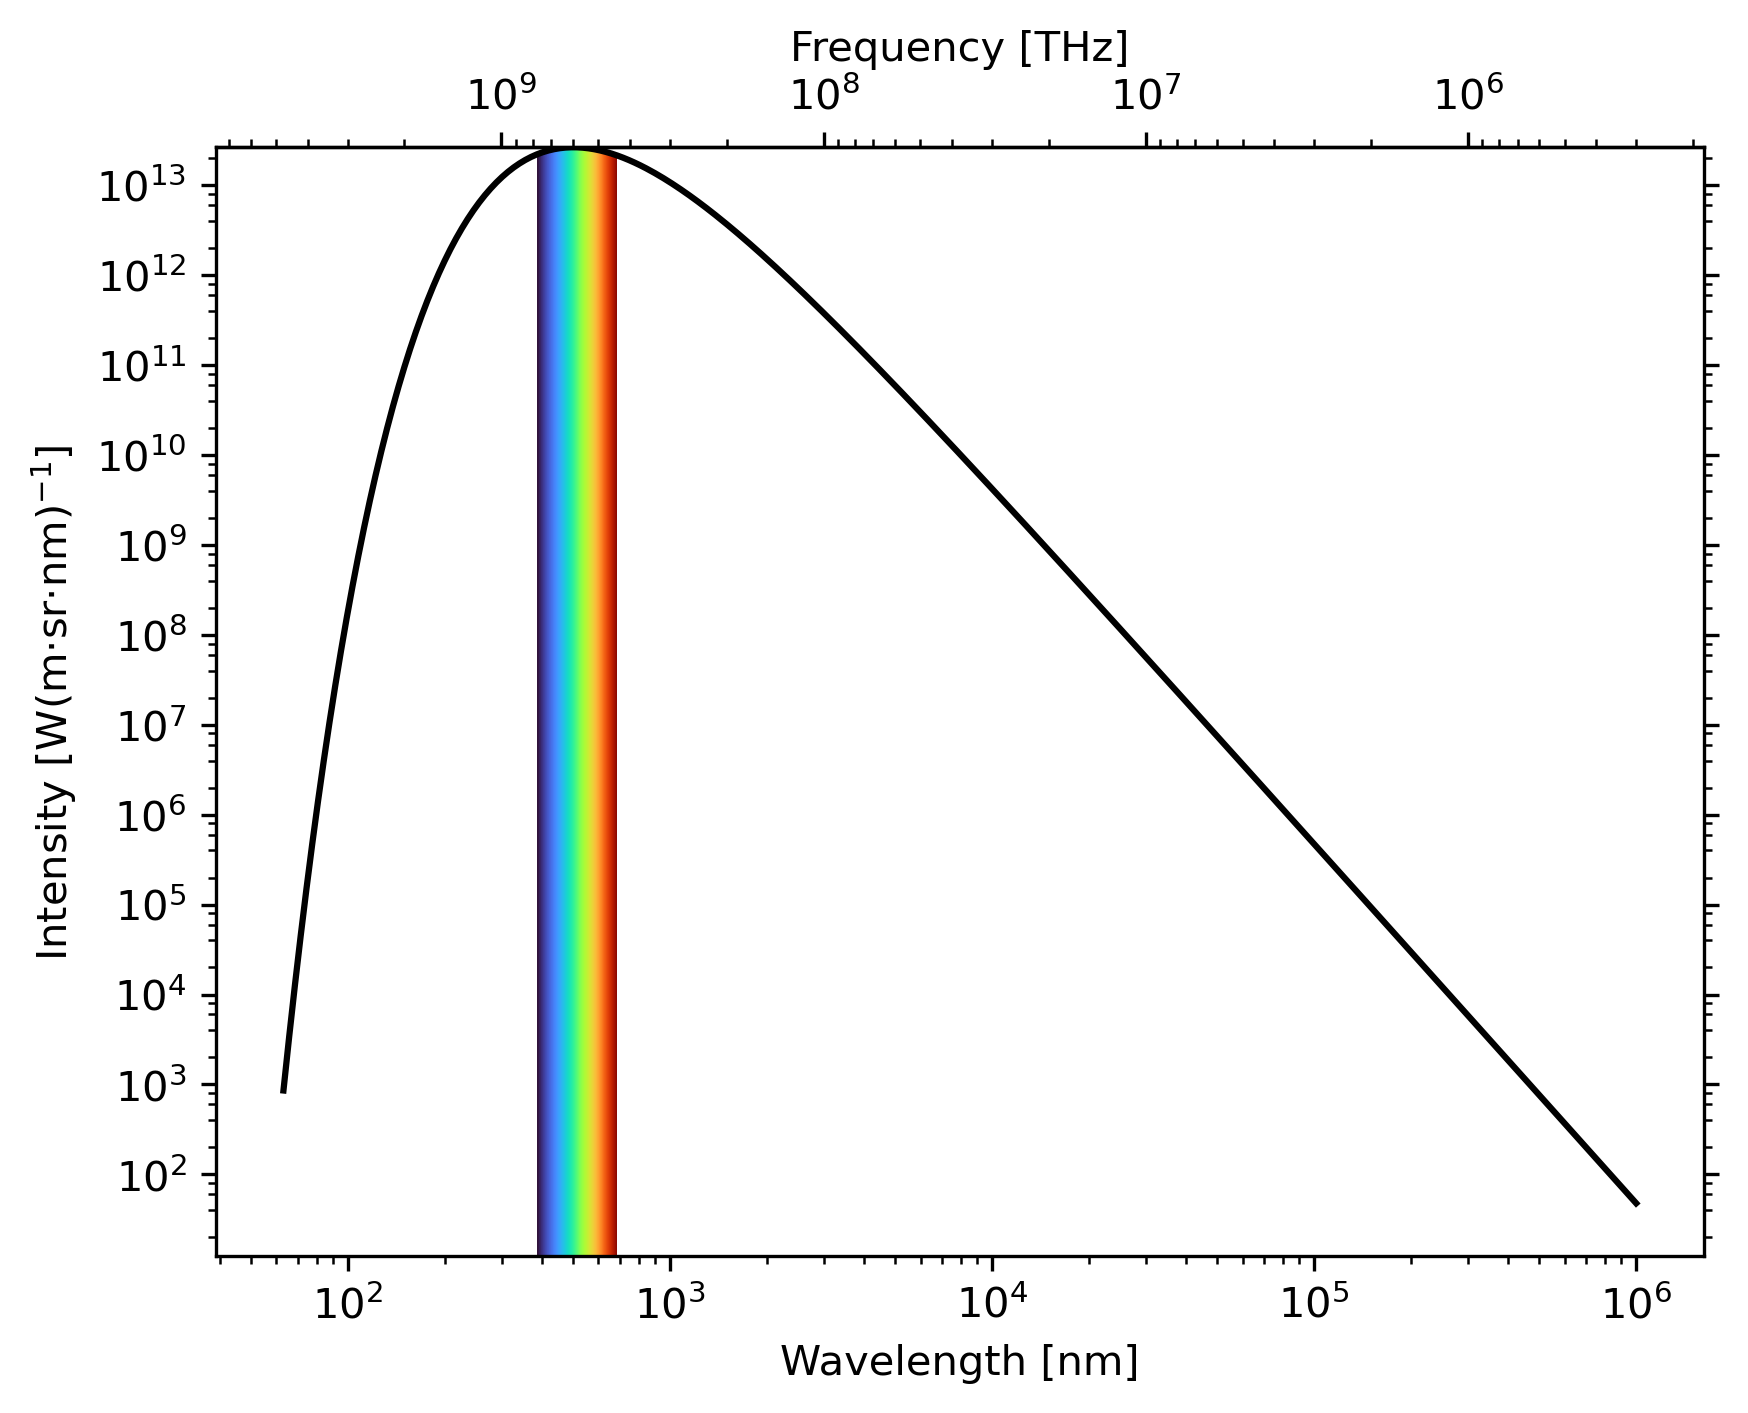

In [8]:
#let's plot a blackbody curve for the temperature of the sun
# as a function of wavelength
c = 2.998*10**8.
k_b = 1.380649*10**-23.
hc = (2.998*10**8.)*(6.626*10**-34.)
def bb(wvl,T):
    return ((2*hc*c)/(wvl**5)) * 1/(np.exp(hc/(wvl*k_b*T)) - 1)

wvs = np.logspace(-7.2,-3.0,471)
bb5777 = bb(wvs,5777.)

import matplotlib as mpl
import matplotlib.ticker as ticks
fig, ax = plt.subplots(dpi=300)
ax.plot(wvs*10**9,bb5777,'k-')

# 1 nm = 10^-9 m, 1 THz = 10^12 Hz
secax = ax.secondary_xaxis('top',functions=(lambda x: 1000*c/x,
                                            lambda x: 0.001*c/x))
#1st func. is primary-to-secondary
#2nd func. is secondary-to-primary

# This part is just for context, to highlight visible light wavelengths
poly=ax.fill_between(wvs[np.where(np.logical_and(wvs>3.8*10**-7,wvs<7*10**-7))]*10**9,
                bb5777[np.where(np.logical_and(wvs>3.8*10**-7,wvs<7*10**-7))],
                color='none') #mark off polygon to fill later
verts = np.vstack([p.vertices for p in poly.get_paths()])
gradient = plt.imshow(np.linspace(0,1, 256).reshape(1, -1),
                      cmap=mpl.colormaps['turbo'], aspect='auto',
                      extent=[verts[:, 0].min(), verts[:, 0].max(),
                              verts[:, 1].min(), verts[:, 1].max()])
gradient.set_clip_path(poly.get_paths()[0], transform=plt.gca().transData)
# I just copied this ^ so my understanding of it is fairly superficial

ax.set_xscale('log')
ax.set_yscale('log')

# PAY SPECIAL ATTENTION TO THE NEXT 4 LINES
ax.yaxis.set_major_locator(ticks.LogLocator(base=10,numticks=99))
ax.yaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),
                                            numticks=99))
ax.yaxis.set_minor_formatter(ticks.NullFormatter())
ax.tick_params(axis='y',which='both',right=True)
#  Must have `numticks` >= the *total* number of major or minor axis
#ticks needed to span the axis, or the whole line will be ignored.
#  For minor ticks, include `subs` kwarg & list increments between major
#ticks where you want minor ticks to be marked, *excluding endpoints*.
#Note that `subs` only spans 2 major axis ticks, while `numticks` must be
#enough to span the entire axis.
#  The last line invoking the `NullFormatter()` turns off labels
#for minor ticks (otherwise all ticks are labeled so none are legible).
#ax.grid(True,which='major',axis='y', zorder=0)
ax.set_xlabel('Wavelength [nm]')
secax.set_xlabel('Frequency [THz]')
ax.set_ylabel('Intensity [W(m$\cdot$sr$\cdot$nm)$^{-1}$]')

For colorbars, there are 2 ways to set the ticks and tick labels: 
- with the `ticks` and `format` kwargs of `colorbar()`, or 
- by setting them afterward with `[cbar].set_ticks()`, where `cbar` is the name of the colorbar instance.

The latter only takes fixed ticks, but in the former, the `format` kwarg takes all the same locator functions that `ax.[x|y]axis.set_[major|minor]_locator()` does, so I will cut this section short and refer viewers to [Matplotlib's colorbar tick labelling demo.](https://matplotlib.org/stable/gallery/ticks/colorbar_tick_labelling_demo.html)

[Matplotlib's documentation and examples for scaling axes are pretty comprehensive](https://matplotlib.org/stable/users/explain/axes/axes_scales.html#other-built-in-scales), so just note that scales that are neither linear nor logarithmic are not suitable for histograms, contours, or other image-like data. If absolutely necessary, you will have to:
1. compute any grids, bins, or KDEs yourself
2. resample the distribution onto a regular grid on a supported scale before plotting
3. be **very** explicit in the caption about the choice of scale and how the data were resized to fit

#### **3. Grids**
Grids are usually left off (often for proprietary reasons), and should stay off if you plan to plot horizontal or vertical lines at specific locations. However, *if* the coordinate system is not Cartesian, grids should always be be included.
- Most matplotlib modules that support non-Cartesian coordinate grids display grids by default, including polar and `axes3d` plots.
- Skewed, rotated, or spherically distorted coordinate systems usually require imported module packages that are specific to your field (e.g. `AstroPy` has the `wcs.WCS` module that you can set as an axis transformation directly), so I consider that outside the scope of this tutorial.
- New distributions incorporate `matplotlib.projections.geo`, which includes support for Aitoff, Hammer, Lambert, and Mollweide axes projections, as well as a customizable `GeoAxes` base class, but the documentation has not caught up. Grids seem to be visible by default.

**Example:** For regular plots and plots with axis transforms specified, `ax.grid(True, linestyle=':', color='silver')` turns the grid on, sets the linestyle to dotted (default is solid) and colors the lines CSS4/X11 silver (default is a slightly darker grey).

If you decide you need to show a grid, keep your typical data format in mind. Try to choose grid line styles that are distinct from you data, but less prominent.
- **Images or 2D histograms:** choose a contrasting color, and consider dotted lines to make the grid less prominent.
  - <span style="color:silver">Leave the grid on top (default).</span>
- **Scattered data:** choose light, thin, solid lines in a neutral color.
  - <span style="color:silver">Set `zorder=0` to put the grid behind your data if they are sparse. If data are dense, leave the grid on top.</span>
  - <span style="color:silver">If figures are online-only, you could use other styles with white/light grids on a grey or black background (e.g. `plt.style.use('seaborn')`).</span>
- **Lines, bars, and stems:** choose thin lines in a neutral color; dotted line style preferred unless there are dotted lines or scattered data also on the plot - then choose solid.
  - <span style="color:silver">Usually looks best to keep the grid behind your data by setting `zorder=0`.</span>
  - <span style="color:silver">For bar and stem plots, only turn on gridlines perpendicular to the bars/stems using the `which` kwarg of `grid()`.</span>

### <span style="color:red">Col</span><span style="color:darkorange">ors</span> <span style="color:yellow">and</span> <span style="color:springgreen">Col</span><span style="color:dodgerblue">orm</span><span style="color:magenta">aps</span>
I'll refer viewers to [Matplotlib's color specification page](https://matplotlib.org/stable/users/explain/colors/colors.html) for the basics on how to specify marker or line colors once you know which to use. But which to use?

Colorblindness affects about 1/12 people with 1 X-chromosome and 1/200 people with at least 2 X-chromosomes. Visuals should be made colorblind friendly when possible without sacrificing distinctiveness for the color-sighted (some shades of green and blue are more distinct with red-green colorblindness than without).

Several online tools exist to help you check your images for color-blind friendliness:
- https://www.color-blindness.com/coblis-color-blindness-simulator/ allows you to upload images and view them through different filters on the site.
- https://colororacle.org/ is a downloadable app that can filter your whole screen (Appears no longer supported – last release in 2018).
- Coolors.co can help you generate n-color palettes, exports code-friendly dictionaries of hex codes, and has a “glasses” button that lets you view the palette as it would appear to the colorblind. (Drawback: color selection is either random or manual.)

#### **1. n-Color Palettes:**
- <span style="color:royalblue">Blue</span> and <span style="color:darkorange">orange</span> are easily distinguished for all types of color-blindness, so they make the best 2-color palette.
- If you need $\leq$5 colors, most of Matplotlib's classic colors with single-letter specifiers are more distinct than the first 5 colors of the Tableau palette, but you will need to omit either <span style="color:red">'r'</span> or <span style="color:#068306">'g'</span>.
- Matplotlib’s built-in Tableau palette is decent starting point if you need more colors, and nicer to look at for those with full color vision, but colorblindness simulators suggest <span style="color:#9467bd">purple</span>, <span style="color:#e377c2">pink</span>, and <span style="color:#bcbd22">olive</span> are problematic – each of these three is nearly indistinguishable from another color for *two* types of color-blindness.</span>

![Matplotlib tableau palette](https://matplotlib.org/stable/_images/sphx_glr_named_colors_002_2_00x.png)
- Tableau published a 10-color palette especially for color-blindness that is slightly better (the last 2 colors would be very hard to see in print), which Matplotlib has available as an importable style file (next section).
- You can also create n-color palettes from colormaps (below). Syntax is: 
    `plt.colormaps['cmap_name'](np.linspace(i, j, data.shape[1]))`
    where i and j are values between 0 and 1 indicating where along the length of the colormap to start and stop (usually want to have i near 0 and j near 1).

Varying colors alone is often not enough. Using different markers or line-styles for each set of data is recommended if you have >2 data sets, and practically required if you have >5 data sets and/or want your data to be printable in greyscale.

#### **2. Color Maps:**
For quantitative color maps, your choices are a bit easier, [and Matplotlib has excellent documentation on how to choose](https://matplotlib.org/stable/users/explain/colors/colormaps.html). In short, consider:
- Monotonicity in brightness (is the transition to dark to light smooth?)
- Dynamic range (how light or dark do the extremes need to be?)
- Should the color map be sequential, diverging, cyclical, or something else?

For **sequential** color maps, you should heavily favor these because they are monotonically increasing in brightness (and cividis is specifically for the color-blind): ![sequential color maps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_008_2_00x.png) As you can see, `'magma'` and `'inferno'` have the largest dynamic range, but the others are more suitable for overlaying black or white markers, text, contours, etc. If you need to overlay multiple colors of markers, lines, or contours, `'gray'`, `'binary'`, and `'bone'` are also decent choices.

For **diverging** color maps, `'coolwarm'`, `'RdBu'`, `'RdYlBu'`, and (surprisingly) `'PiYG'` are the only color maps that simulations suggest won't cause confusion with colorblindness, and vary smoothly both directions to similar extremes of darkness.

There are only 3 choices of **cyclic** color maps, and looking at the plot below, it should be easy to see why `'hsv'` should not be used.
![cyclic cmaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_012_2_00x.png)

Final note: every color map can be reversed in order by adding `_r` to the end of the color map string before the closing apostrophe or quotation mark. E.g. to set the `coolwarm` color map such that higher values are bluer instead of redder, you would set `cmap = 'coolwarm_r'`.

### Putting it all together: rcParams and Style Sheets
An enormous list of plot properties are set behind the scenes by Matplotlib's default runtime configuration parameters, or `rcParams`, including:
- figure size, resolution, aspect ratio, padding, and subplot spacing, set separately for `plt.show()` and `plt.savefig()`
- fonts, font sizes, weights and letter spacing (e.g. monospace)
- marker sizes, colors, fill styles, and the default shape 
- color maps, and color- and line-cycles
- axes tick lengths, widths, colors, visibility, and orientations, set separately for major and minor ticks on each axis
- and SO much more!

Any of these properties can be changed at runtime or in your code to affect every plot afterward until the `rcParams` are changed or reset, or until the kernel resets. [Matplotlib also provides a number of built-in style sheets that can be used to change the defaults, including one that automatically cycles through the Tableau color-blind 10-color palette](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), which you can import via e.g. `plt.style.use('tableau-colorblind10')`

But what if you want to set your own style features and port them around so that you always have the same settings? You can make your own style sheet (or copy a template and modify it)!
- A `.mplstyle` file is just a text file of key-value pairs where each key is the rcParam you want to modify.
- Each style sheet only needs to contain what you want to be different from the defaults.
- You can create and import a list of style sheets, each of which addresses a different set of rcParams.

The `mpl4publication.mplstyle` file attached incorporates most of my suggestions for axes, grids, ticks, font sizes, and color palettes, wherever those suggestions were consistent across different plot types. The color palette was chosen such that all 10 colors would be distinguishable for the colorblind (based on the CoBliS simulator) without being too light.

If you want to apply a couple of rcParams changes only to a specific plot or set of plots and have the rcParams reset automatically afterward, nest all plots that use the desired rcParams change in a `with` statement using `style.context()`, as in the following example:

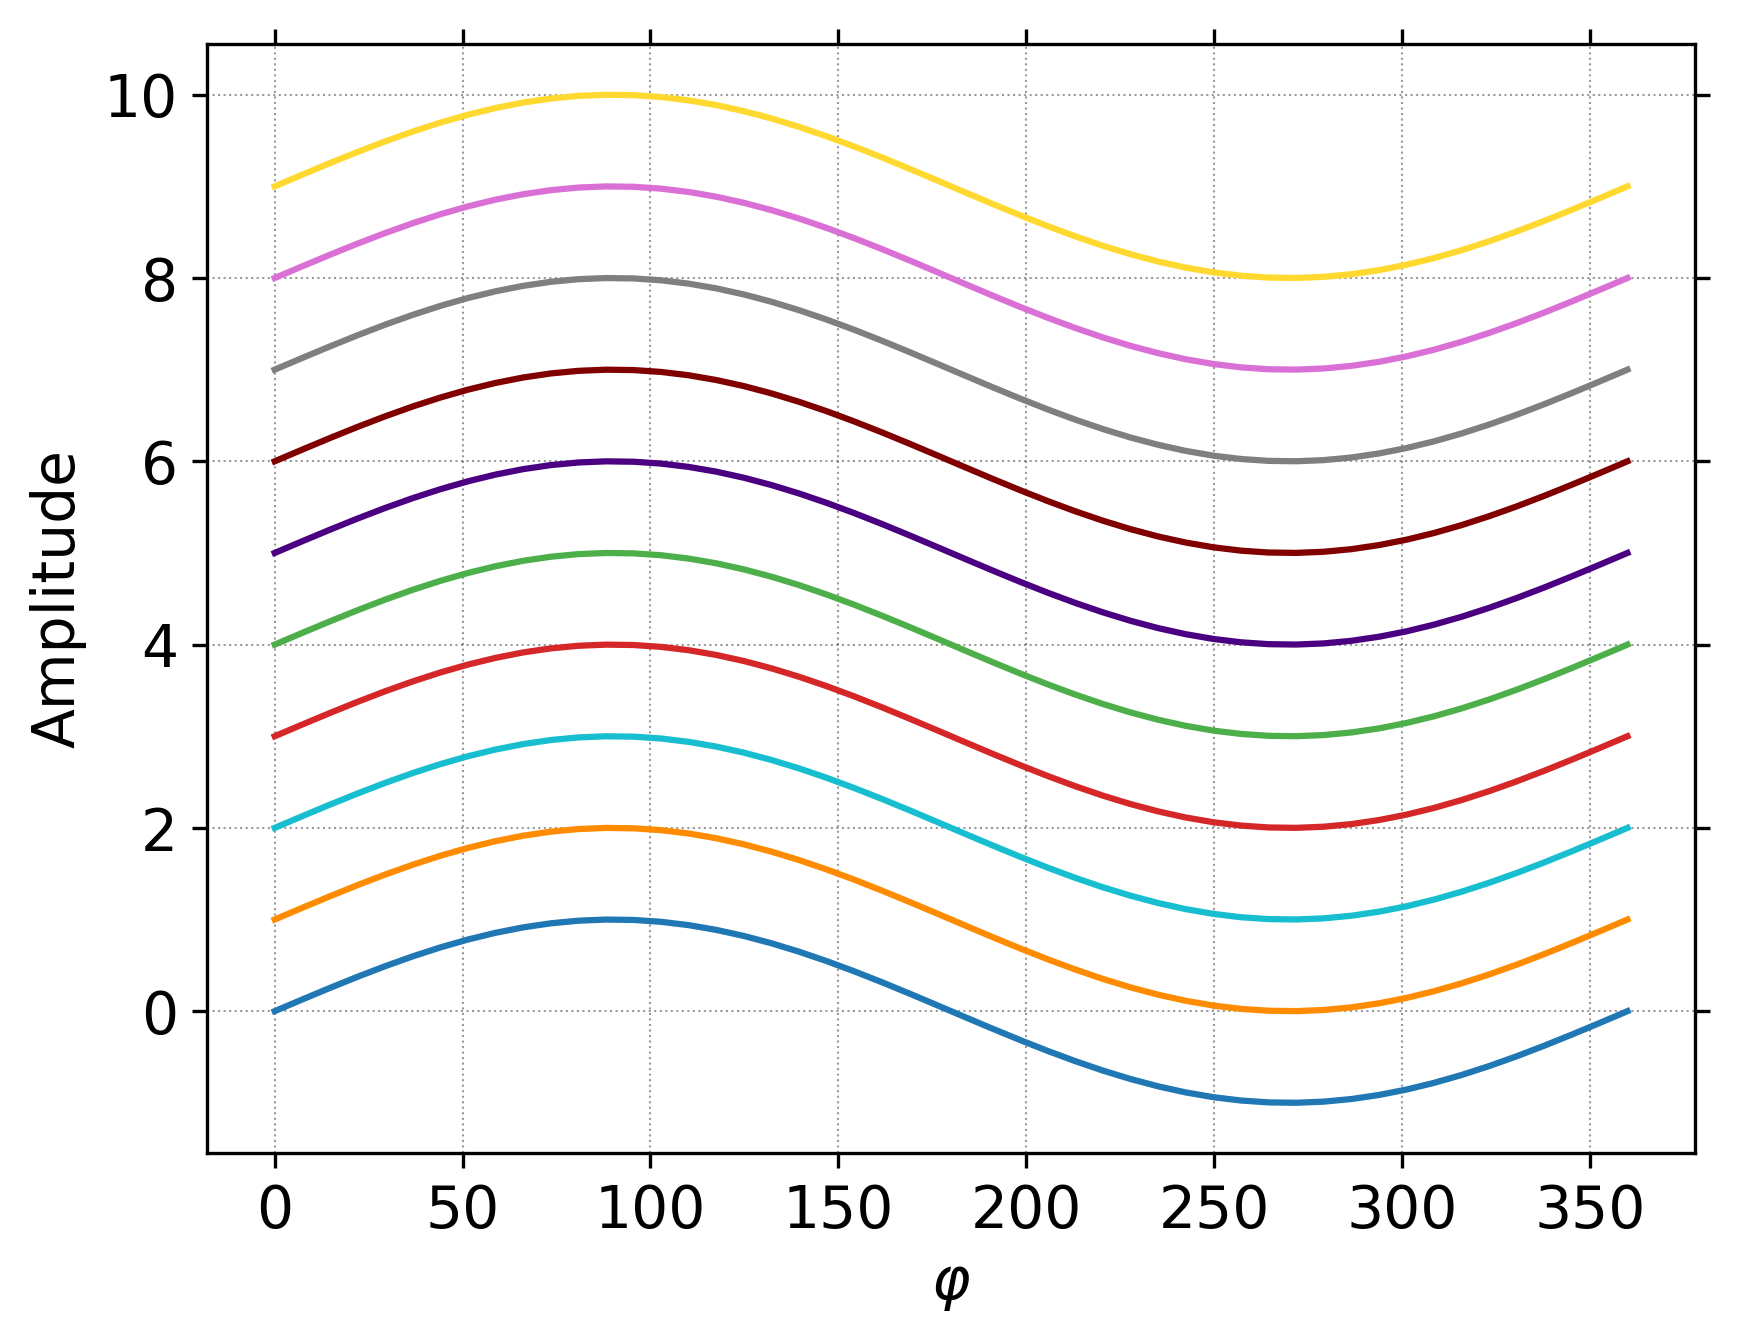

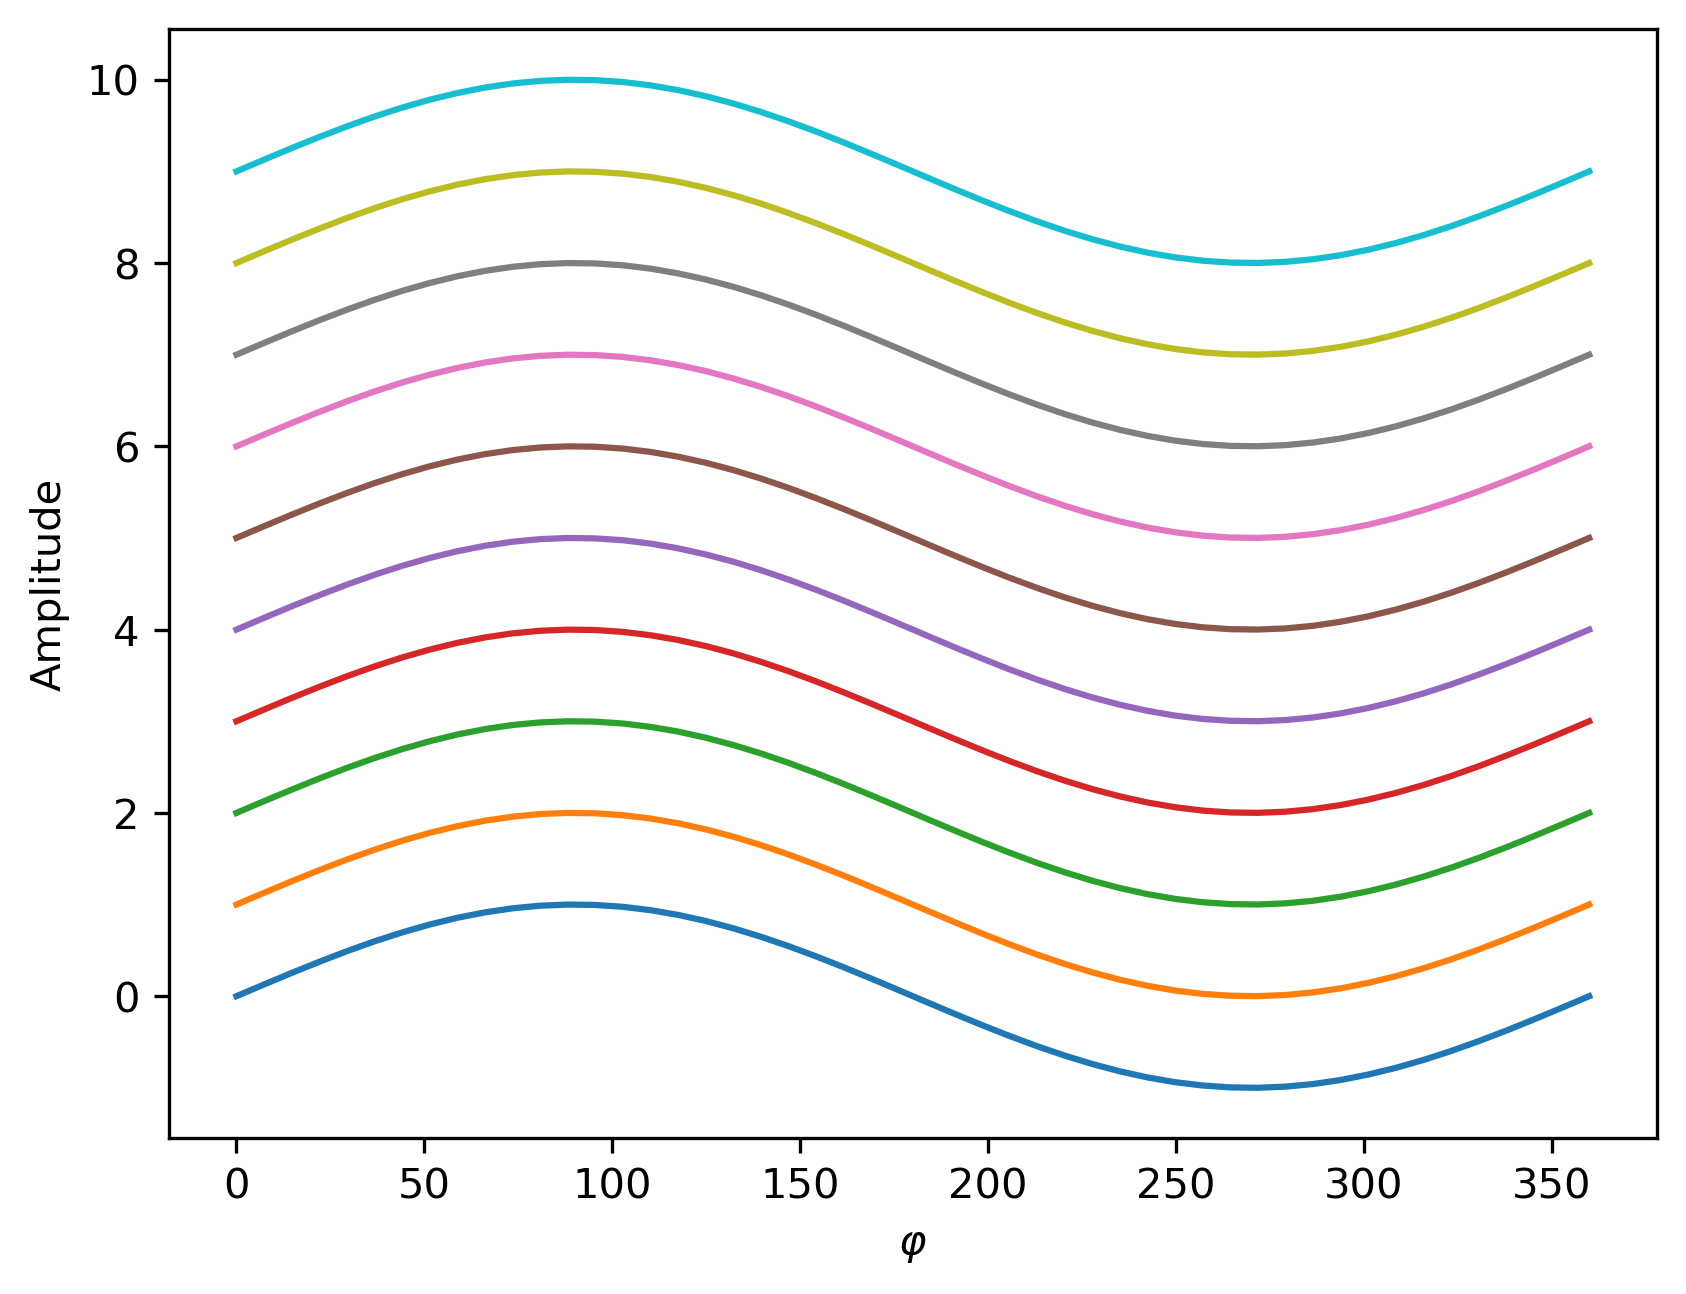

In [51]:
plt.figure(dpi=300)
with plt.style.context('./mpl4publication.mplstyle'):
    for i in range(10):
        y = i+np.sin(np.linspace(0, 2 * np.pi))
        plt.plot(np.linspace(0,360,len(y)),y)
        plt.xlabel(r'$\varphi$')
        plt.ylabel('Amplitude')
plt.show()

#mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(dpi=300)
y = np.sin(np.linspace(0, 2 * np.pi))
for i in range(10):
    y = i+np.sin(np.linspace(0, 2 * np.pi))
    plt.plot(np.linspace(0,360,len(y)),y)
    plt.xlabel(r'$\varphi$')
    plt.ylabel('Amplitude')
plt.xlabel(r'$\varphi$')
plt.ylabel('Amplitude')
plt.show()